<center><img src="https://upload.wikimedia.org/wikipedia/commons/thumb/f/fd/RMS_Titanic_3.jpg/1280px-RMS_Titanic_3.jpg" alt="Titanic" width = "500"></center>

# Introduction <a id = "0"></a>
***
<font size="5"><center><em> "The Titanic case has been used too often and feels dull" </em></center></font>

But overthinking only kept my data project stuck in emptiness. Finally, I decided to push forward and disregard that notion. Why not kickstart my data science project with the Titanic case?
In that decision, I found newfound inspiration. I laid out the steps, prepared my Python notebook, and began delving into the Titanic dataset. Despite the debated boredom, I discovered intriguing findings that sharpened my data science skills.<br>
So, let's leave behind the common mindset and dare to face the challenge. This is my first step towards building an extraordinary data science portfolio.

## About Titanic Disaster <a id = "0.1"></a>
The sinking of the Titanic is one of the most infamous shipwrecks in history.
On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone onboard, resulting in the death of 1502 out of 2224 passengers and crew.<br>
While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others.

## Objectives <a id = "0.2"></a>
- Do an **Exploratory Data Analysis (EDA)** of Titanic Disaster
- Build a **predictive model** to predict the chances of passengers survival
- **KICKSTART FOR MY DATA SCIENCE PROJECT 🔥🔥🔥**

# 1. Importing Necessary Library and Dataset 📊 <a id = "1"></a>
***
To start this project, first we need to prepare the required libraries and datasets
## 1.1 Importing Library <a id = "1.1"></a>
Want to expolore and analyze data more easily❔❔❔<br>
The answer lies in using **libraries**❗❗❗

In this section we will import libraries to assist us in analyzing the Titanic data

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
plt.style.use('fivethirtyeight')
import seaborn as sns

import warnings
warnings.filterwarnings('ignore') ## To ignore warning

from collections import Counter # To help detect outlier

%config InlineBackend.figure_format = 'retina' 
# %matplotlib inline
## the output of plotting commands is displayed inline within frontends like the Jupyter notebook, directly below the code cell that produced it. The resulting plots will then also be stored in the notebook document

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


## 1.2. Loading Dataset <a id = "1.2"></a>
There are three csv on this project, but we will only use two of them  (train.csv & test.csv).

**Data Training** (train.csv): The training data is used to train the machine learning model by feeding it labeled examples and enabling it to capture patterns and relationships between input features and corresponding labels.

**Data Test**(test.csv): The test data is a separate dataset used to evaluate the performance of the trained model by comparing its predictions against the true labels, allowing us to assess how well the model can generalize and make accurate predictions on unseen data.

In [2]:
train_df = pd.read_csv('/kaggle/input/titanic/train.csv')
test_df = pd.read_csv('/kaggle/input/titanic/test.csv')
combine = pd.concat([train_df.drop('Survived',1),test_df])

# 2. Overview Data 🔎 <a id = "2"></a>
***
Let's look at the data in general starting from its shape, what columns are available, summary statistics, and so on

## 2.1. An Overview of The Dataset <a id = "2.1"></a>

### Training Dataset (train.csv)

In [3]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### Test Dataset (test.csv)

In [6]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [7]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [8]:
test_df.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In general there is no big difference between **Data Training** and **Data Test**. </br>However, there is one very clear difference between these two data, which is that the test data does not have a `survived` column. This is not a problem because later we will fill in the `survived` column in the test data using the predicted results that we will make later

## 2.2. About Dataset <a id = "2.2"></a>

Now let's look at the features of the dataset and its types:

### Categorical
* **Nominal** (Categories or group that have no intrinsic order or rank)
 * **Cabin** (Cabin Number)
 * **Embarked** (Port of Embarkation)
 * **Sex**
 
* **Ordinal** (Categories or group that have intrinsic order or rank)
 * **Pclass** (Ticket Class)
   * 1 = 1st / Upper
   * 2 = 2nd / Middle
   * 3 = 3rd / Lower
 

### Numeric
* **Discrete**
 * **Passenger ID** (Unique ID for each passenger)
 * **SibSp** (# of siblings / spouse aboard the Titanic)
 * **Parch**(# of parents / children aboard the Titanic)
 * **Survival**
   * **0** = Did Not Survived
   * **1** = Survived

* **Continuous**
 * **Age** (Age in years)
 * **Fare** (Passenger fare)

### Text
* **Ticket** (Ticket Number)
* **Name** (Passenger Name)

## 2.3. Tableau Visualization <a id = "2.3"></a>
Before I made this notebook I've tried to play around using the same data using Tableau. I did this in order to get another perspective when exploring data. Apart from that, by using Tableau, we can also create interactive dashboards.

In [9]:
%%HTML
<div class='tableauPlaceholder' id='viz1688721483092' style='position: relative'><noscript><a href='#'><img alt='Dashboard ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Ov&#47;OverviewTitanicTrainingDataset&#47;Dashboard&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='site_root' value='' /><param name='name' value='OverviewTitanicTrainingDataset&#47;Dashboard' /><param name='tabs' value='no' /><param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Ov&#47;OverviewTitanicTrainingDataset&#47;Dashboard&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /><param name='language' value='en-US' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1688721483092');                    var vizElement = divElement.getElementsByTagName('object')[0];                    vizElement.style.width='1600px';vizElement.style.height='927px';                    var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_distribution(train_df, columns):
    num_columns = len(columns)
    num_rows = 1
    if num_columns > 2:
        num_rows = (num_columns + 1) // 2

    fig, axes = plt.subplots(num_rows, 2, figsize=(15 * 2, 8 * num_rows))
    axes = axes.ravel()

    for i, column in enumerate(columns):
        ax = sns.kdeplot(train_df.loc[(train_df['Survived'] == 0), column], color='gray', shade=True, label='Not Survived', ax=axes[i])
        ax = sns.kdeplot(train_df.loc[(train_df['Survived'] == 1), column], color='green', shade=True, label='Survived', ax=axes[i])
        ax.set_title(f'{column} Distribution - Survivors vs Non Survivors', fontsize=20, pad=20)
        ax.set_xlabel(column, fontsize=15, labelpad=10)
        ax.set_ylabel('Frequency', fontsize=15, labelpad=10)
        ax.legend()

    # Remove unused axes
    for j in range(len(columns), len(axes)):
        axes[j].axis('off')

    plt.tight_layout()
    plt.show()


# 3. Cleaning the Data 🧹 <a id = "3"></a>
***
At this section we will cleaning data from **Outlier, Missing Values, and Inconsistent Data**

## 3.1. Outlier <a id = "3.1"></a>
*Outlier is a person, thing, or fact that is very different from other people, things, or facts, so that it cannot be used to draw general conclusion*

We will start from detect the outlier using graph

In [11]:
def plot_distribution(train_df, columns, main_title=""):
    num_columns = len(columns)
    num_rows = 1
    if num_columns > 2:
        num_rows = (num_columns + 1) // 2

    fig, axes = plt.subplots(num_rows, 2, figsize=(15 * 2, 8 * num_rows))
    axes = axes.ravel()
    
    plt.suptitle(main_title, fontsize=25, y=1.02)

    for i, column in enumerate(columns):
        ax = sns.kdeplot(train_df.loc[(train_df['Survived'] == 0), column], color='gray', shade=True, label='Not Survived', ax=axes[i])
        ax = sns.kdeplot(train_df.loc[(train_df['Survived'] == 1), column], color='green', shade=True, label='Survived', ax=axes[i])
        ax.set_title(f'{column} Distribution - Survivors vs Non Survivors', fontsize=20, pad=20)
        ax.set_xlabel(column, fontsize=15, labelpad=10)
        ax.set_ylabel('Frequency', fontsize=15, labelpad=10)
        ax.legend()

    # Remove unused axes
    for j in range(len(columns), len(axes)):
        axes[j].axis('off')

#     plt.tight_layout()
    plt.show()


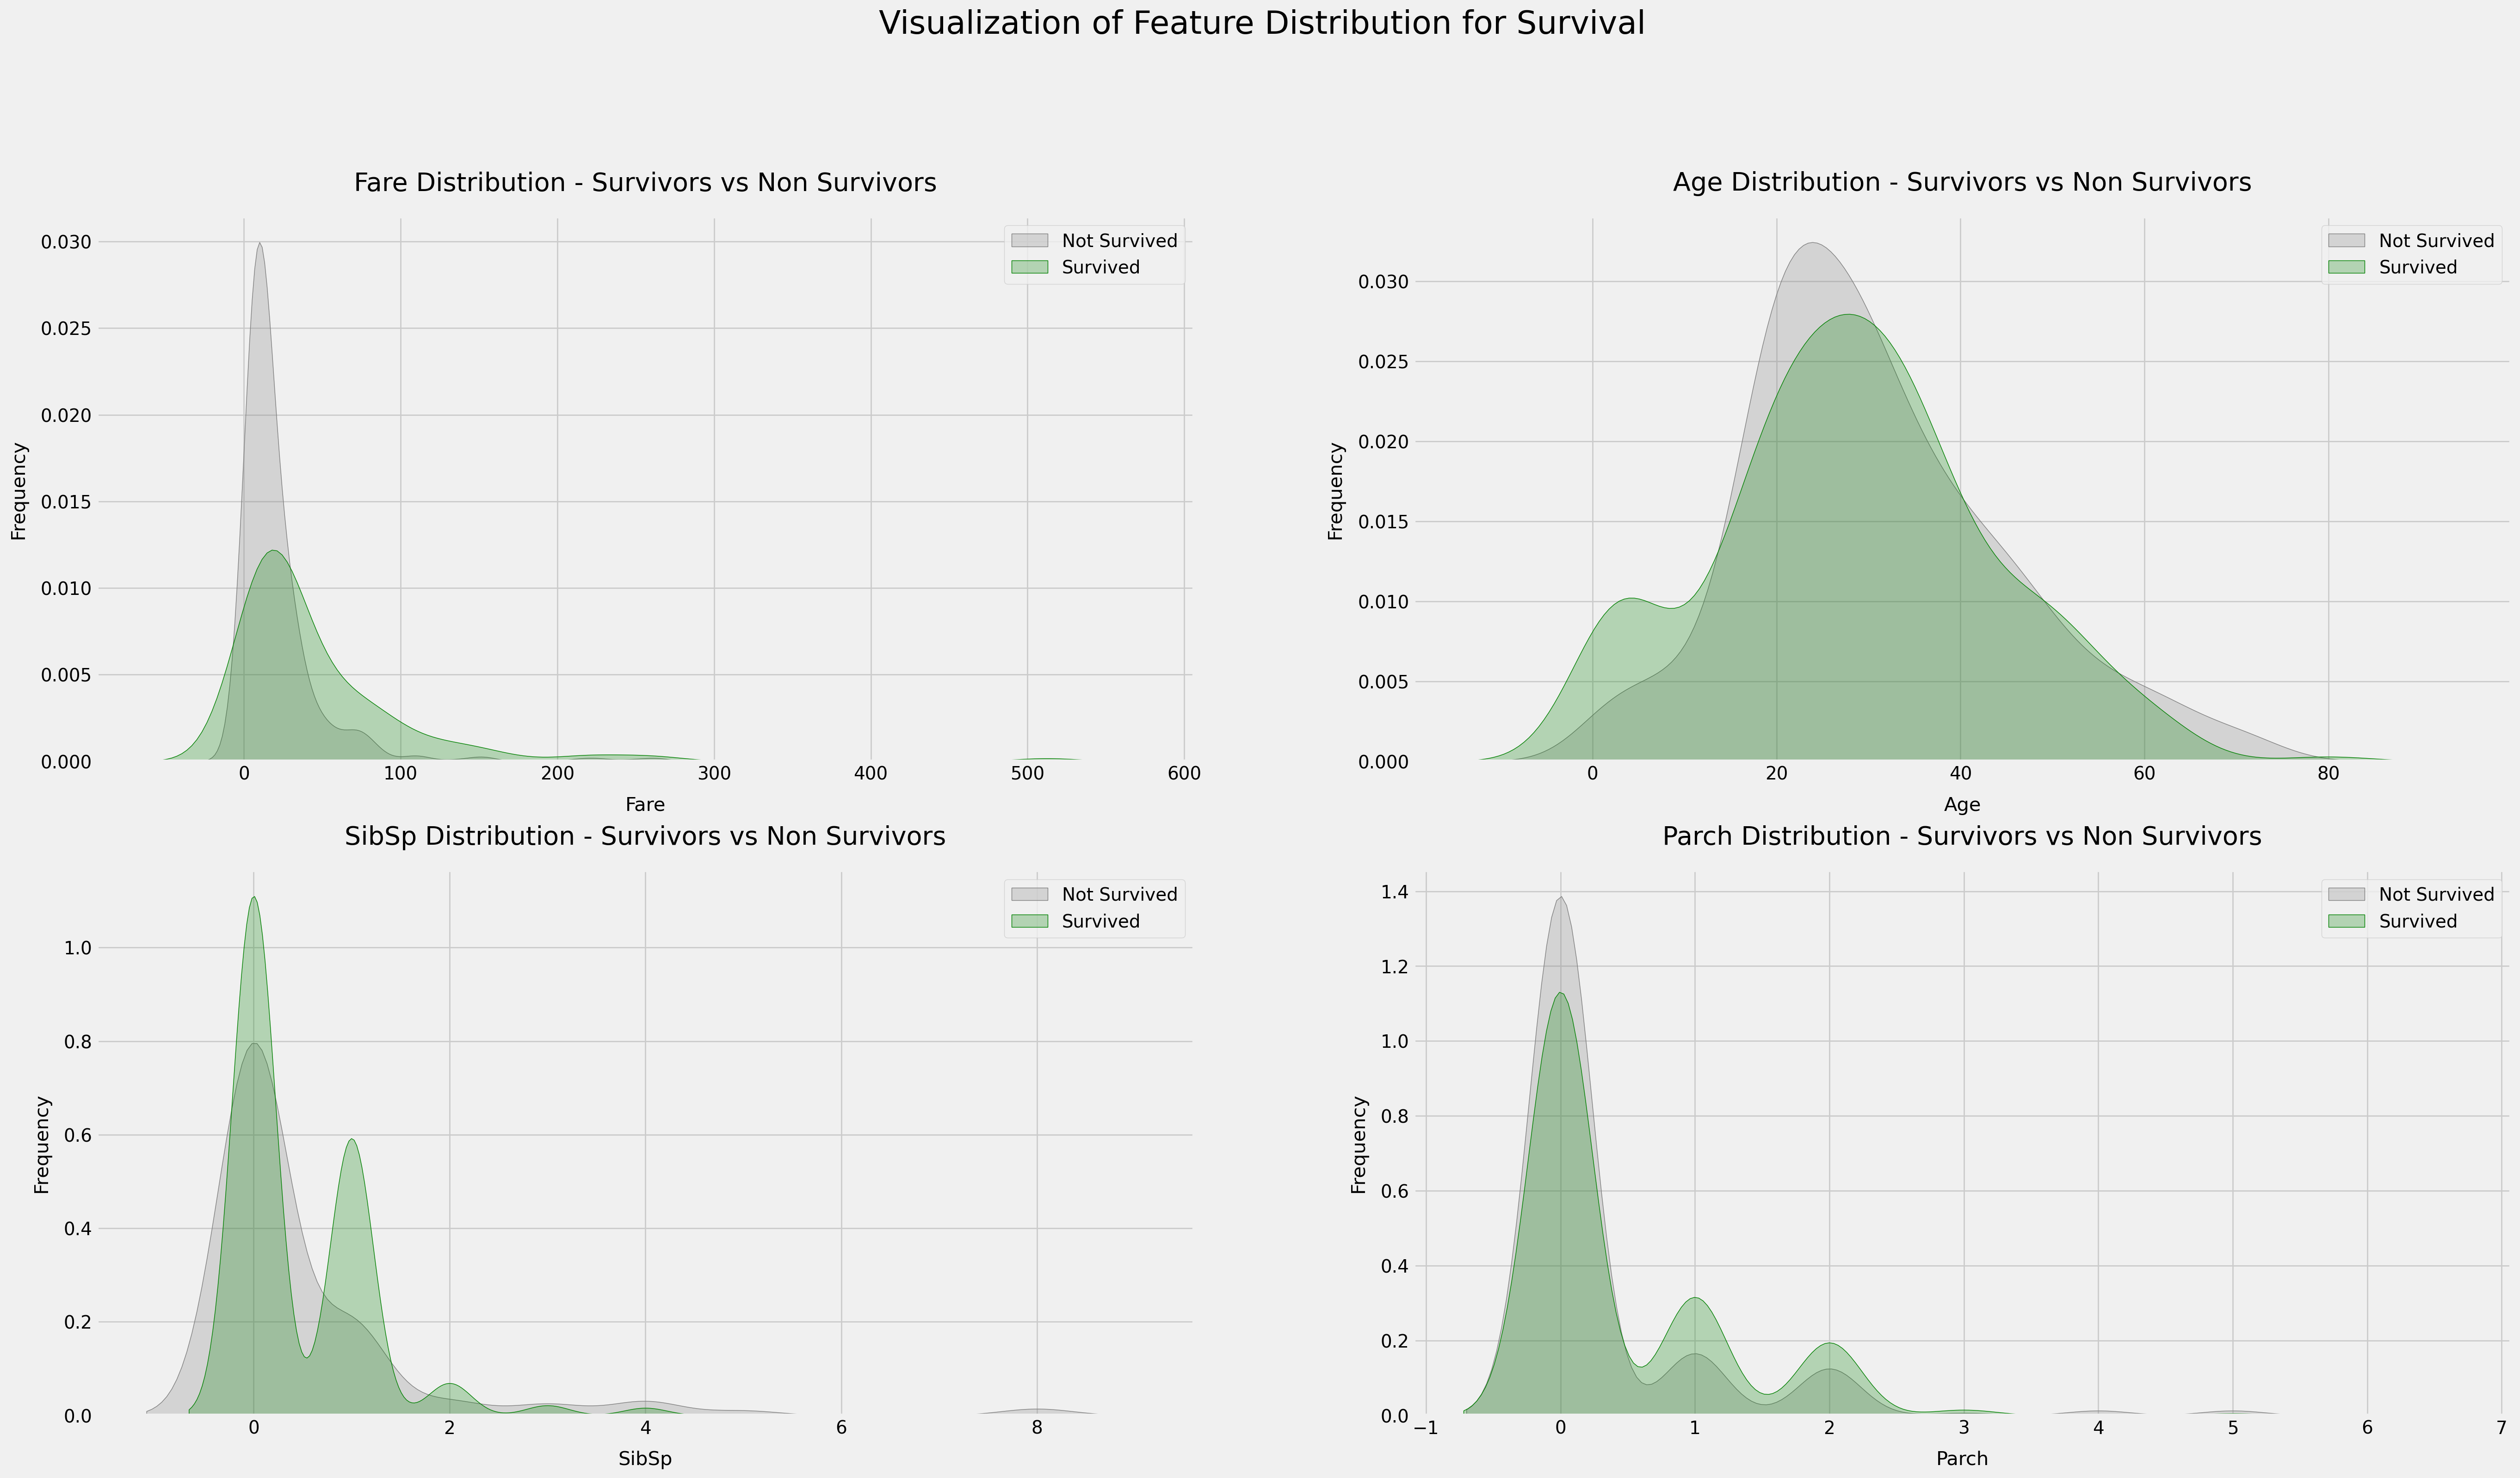

In [12]:
plot_distribution(train_df, ['Fare','Age','SibSp','Parch'], "Visualization of Feature Distribution for Survival")

* Taking a quick glance at the chart above, we might spot something interesting in the `Fare` feature. There's a point where the frequency seems to pause around 300 and then picks up again around 500. This could suggest the presence of outliers.

* Turning our attention to the `Age` feature, things look quite normal overall. Although, on the left side of the distribution, we can see a clear concentration of passengers under 10 years old who managed to survive. It's likely that this happened because children and infants were given priority during the evacuation process – a heartwarming detail.

* As for the `SibSp` and `Parch` features, they don't show any major surprises, except for the highest values of 8 for SibSp and 6 for Parch. We might wonder if these are outliers. I'll delve into that in the upcoming section.

Let's zoom in for a closer look at the data around the value of 500 using a scatterplot. We'll also blend in the `Age` feature to provide a clearer picture.

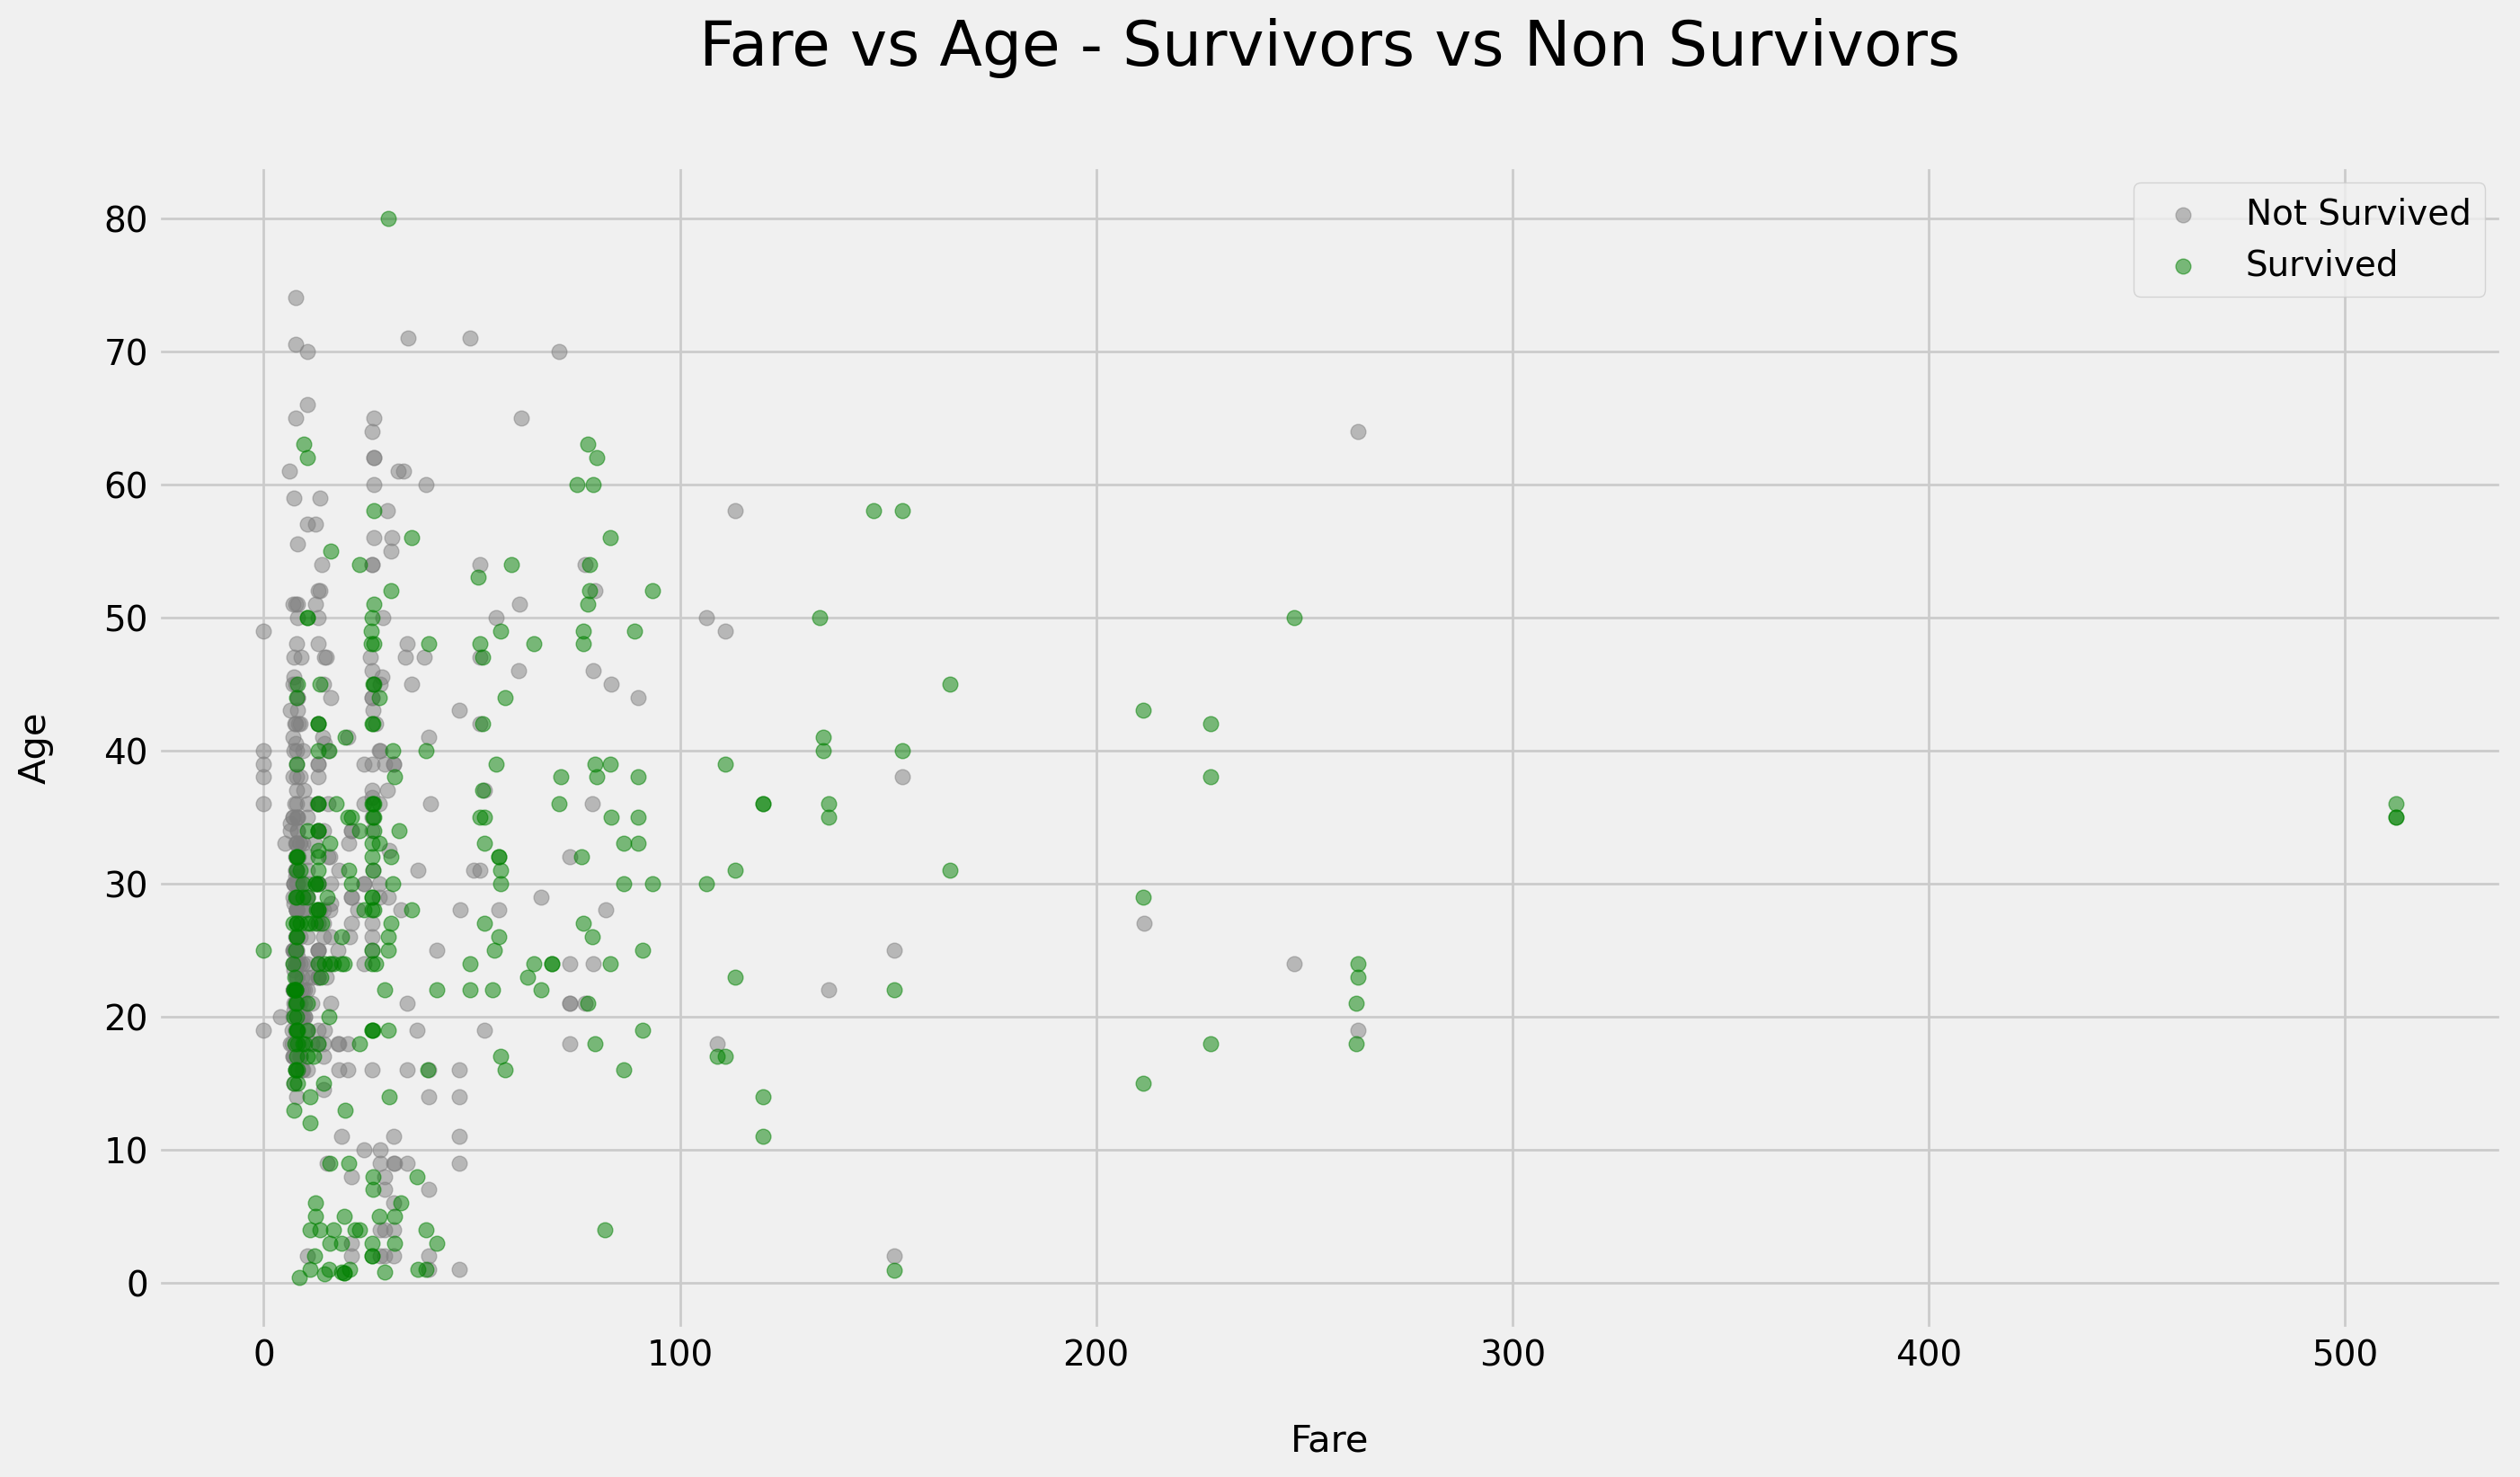

In [13]:
fig = plt.figure(figsize=(15, 8))

# Scatter plot for 'Not Survived'
plt.scatter(train_df.loc[train_df['Survived'] == 0, 'Fare'], 
            train_df.loc[train_df['Survived'] == 0, 'Age'], 
            color='gray', alpha=0.5, label='Not Survived')

# Scatter plot for 'Survived'
plt.scatter(train_df.loc[train_df['Survived'] == 1, 'Fare'], 
            train_df.loc[train_df['Survived'] == 1, 'Age'], 
            color='green', alpha=0.5, label='Survived')

plt.title('Fare vs Age - Survivors vs Non Survivors', fontsize=25, pad=40)
plt.xlabel('Fare', fontsize=15, labelpad=20)
plt.ylabel('Age', fontsize=15, labelpad=20)
plt.legend()
plt.show()


With the scatterplot we've created, it's much clearer that there are outliers with `Fare` values exceeding 500. Let's examine these details closely and proceed to remove them for better accuracy.

In [14]:
# Show the outlier
print(train_df.Fare > 500)

# drop the outlier
train_df = train_df[train_df.Fare < 500]

0      False
1      False
2      False
3      False
4      False
       ...  
886    False
887    False
888    False
889    False
890    False
Name: Fare, Length: 891, dtype: bool


Next, let's take a closer look at the `SibSp` feature to determine whether there are any outliers present. Shall we?

In [15]:
train_df[train_df.SibSp >= 5]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
59,60,0,3,"Goodwin, Master. William Frederick",male,11.0,5,2,CA 2144,46.90,NaN,S
71,72,0,3,"Goodwin, Miss. Lillian Amy",female,16.0,5,2,CA 2144,46.90,NaN,S
159,160,0,3,"Sage, Master. Thomas Henry",male,NaN,8,2,CA. 2343,69.55,NaN,S
180,181,0,3,"Sage, Miss. Constance Gladys",female,NaN,8,2,CA. 2343,69.55,NaN,S
201,202,0,3,"Sage, Mr. Frederick",male,NaN,8,2,CA. 2343,69.55,NaN,S
324,325,0,3,"Sage, Mr. George John Jr",male,NaN,8,2,CA. 2343,69.55,NaN,S
386,387,0,3,"Goodwin, Master. Sidney Leonard",male,1.0,5,2,CA 2144,46.90,NaN,S
480,481,0,3,"Goodwin, Master. Harold Victor",male,9.0,5,2,CA 2144,46.90,NaN,S
683,684,0,3,"Goodwin, Mr. Charles Edward",male,14.0,5,2,CA 2144,46.90,NaN,S
792,793,0,3,"Sage, Miss. Stella Anna",female,NaN,8,2,CA. 2343,69.55,NaN,S


Dilihat dari namanya, ternyata pneumpang-penumpang ini memang satu keluarga. Jadinya ini tidak bisa dikategorikan sebagi outlier

Terakhir, mari kiat lihat fitur Parch

In [16]:
train_df[train_df.Parch > 3].sort_values(by='Parch')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
167,168,0,3,"Skoog, Mrs. William (Anna Bernhardina Karlsson)",female,45.0,1,4,347088,27.9000,NaN,S
360,361,0,3,"Skoog, Mr. Wilhelm",male,40.0,1,4,347088,27.9000,NaN,S
438,439,0,1,"Fortune, Mr. Mark",male,64.0,1,4,19950,263.0000,C23 C25 C27,S
567,568,0,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,NaN,S
13,14,0,3,"Andersson, Mr. Anders Johan",male,39.0,1,5,347082,31.2750,NaN,S
25,26,1,3,"Asplund, Mrs. Carl Oscar (Selma Augusta Emilia...",female,38.0,1,5,347077,31.3875,NaN,S
610,611,0,3,"Andersson, Mrs. Anders Johan (Alfrida Konstant...",female,39.0,1,5,347082,31.2750,NaN,S
638,639,0,3,"Panula, Mrs. Juha (Maria Emilia Ojala)",female,41.0,0,5,3101295,39.6875,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
678,679,0,3,"Goodwin, Mrs. Frederick (Augusta Tyler)",female,43.0,1,6,CA 2144,46.9000,NaN,S


When we examine the data, there doesn't seem to be anything unusual. As for the passenger with the highest `Parch` value, Mrs. Frederick, we can cross-check this with the `SibSp` feature. It turns out she indeed traveled with her 5 children, which explains the higher value.

## 3.2. Missing Values <a id = "3.2"></a>
***Nothing is perfect in this world***, and neither with this dataset. There are some missing values on this dataset. So let's handle this!

In [17]:
def missing_values(df):
    total = df.isnull().sum().sort_values(ascending = False)
    percentage = round(df.isnull().sum().sort_values(ascending = False)/len(df)*100,2)
    return pd.concat([total,percentage], axis = 1, keys = ['Total','Percentage'])

In [18]:
missing_values(train_df)

,Total,Percentage
Cabin,686,77.25
Age,177,19.93
Embarked,2,0.23
PassengerId,0,0.00
Survived,0,0.00
Pclass,0,0.00
Name,0,0.00
Sex,0,0.00
SibSp,0,0.00
Parch,0,0.00


There are three features that have null values. I'll using different method to handle these three features, because sometimes different features need different ways to handle. Let's start with the smallest one, **Embarked**

### 3.2.1 Embarked <a id = "3.2.1"></a>

In [19]:
def percent_value_counts(df,feature):
    percent = pd.DataFrame(round(df.loc[:,feature].value_counts(dropna=False, normalize=True)*100,2))
    total = pd.DataFrame(df.loc[:,feature].value_counts(dropna=False))
    total.columns = ["Total"]
    percent.columns = ["Percentage"]
    return pd.concat([total,percent], axis=1)

In [20]:
percent_value_counts(train_df,'Embarked')

,Total,Percentage
S,644,72.52
C,165,18.58
Q,77,8.67
NaN,2,0.23


So `Embarked` has 2 missing values. To handle this, I will use the port with the most passengers to fill the missing values

In [21]:
mode_embarked = train_df['Embarked'].mode()[0]

train_df['Embarked'].fillna(mode_embarked,inplace=True)

In [22]:
percent_value_counts(train_df,'Embarked')

,Total,Percentage
S,646,72.75
C,165,18.58
Q,77,8.67


### 3.2.2 Age <a id = "3.2.2"></a>
Actually in a simple way we can assign the mean age of the dataset. But as we can see earlier there are a lot of passenger from different group ages. I also can't assign a kid with the mean age the dataset right?

So to handle missing values in this feature, I need to look for another information that will help me. We can check the `Name` feature, with this we can see that the names have a salutation like Mr or Mrs. In the end we can assign the mean values of Mr or Mrs to the respective group
***
*This method are inspired by Aswhini Swain on EDA To Prediction ([DieTanic](https://www.kaggle.com/code/ash316/eda-to-prediction-dietanic)).*

In [23]:
# Create new column 'Initial'
train_df['Initial'] = 0

# Extract salutation to 'Initial'
for i in train_df:
    train_df['Initial']=train_df.Name.str.extract('([A-Za-z]+)\.') #for strings which lie between A-Z or a-z and followed by a .(dot). So we successfully extract the Initials from the Name.

In [24]:
# Check initial by gender
pd.crosstab(train_df.Initial, train_df.Sex).T.style.background_gradient('summer_r')

Initial,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,181,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,515,0,0,6,1


As we can see, there are lots of greetings in this "name" feature. But for now we will group them into several groups

In [25]:
# Replace some initial to several groups
train_df['Initial'].replace(['Col','Countess','Don','Dr','Jonkheer','Lady','Major','Mlle','Mme','Ms','Rev','Sir'],['Other','Mrs','Mr','Mr','Other','Mrs','Mr','Miss','Miss','Miss','Other','Mr'],inplace=True)

In [26]:
# Check the average age by initial groups
train_df.groupby('Initial')['Age'].mean()

Initial
Capt      70.000000
Master     4.574167
Miss      21.771812
Mr        32.634236
Mrs       35.981818
Other     45.888889
Name: Age, dtype: float64

Let's now assign this average value to each NaN value in each of the initial groups

In [27]:
# Create a function to fill the missing values based on the average of a group
def fill_missing_group_mean(df, group, col):
    # Calculate mean for every group
    average_col_by_group = df.groupby(group)[col].transform('mean')
    # FIll null values using mean for every group
    df[col].fillna(average_col_by_group, inplace=True)

In [28]:
fill_missing_group_mean(train_df,'Initial','Age')

In [29]:
# Let's see if there are still empty values in the "Age" feature or not
missing_values(train_df)

,Total,Percentage
Cabin,686,77.25
PassengerId,0,0.00
Survived,0,0.00
Pclass,0,0.00
Name,0,0.00
Sex,0,0.00
Age,0,0.00
SibSp,0,0.00
Parch,0,0.00
Ticket,0,0.00


### 3.2.3 Cabin <a id = "3.2.3"></a>
As we can see before there lots of null values on this feature and also many passengers have multiple cabins. So I'll drop this feature

In [30]:
train_df.drop(['Cabin'], axis=1, inplace=True)
train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Initial
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,S,Mr
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,S,Other
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,S,Miss
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,21.771812,1,2,W./C. 6607,23.4500,S,Miss
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C,Mr


# 4. Analysis of The Features 📝 <a id = "4"></a>
***
In this section I will analyze each feature and also look for important findings for each feature

## 4.1 Sex <a id = "4.1"></a>

In [31]:
train_df.groupby(['Sex','Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           232
male    0           468
        1           107
Name: Survived, dtype: int64

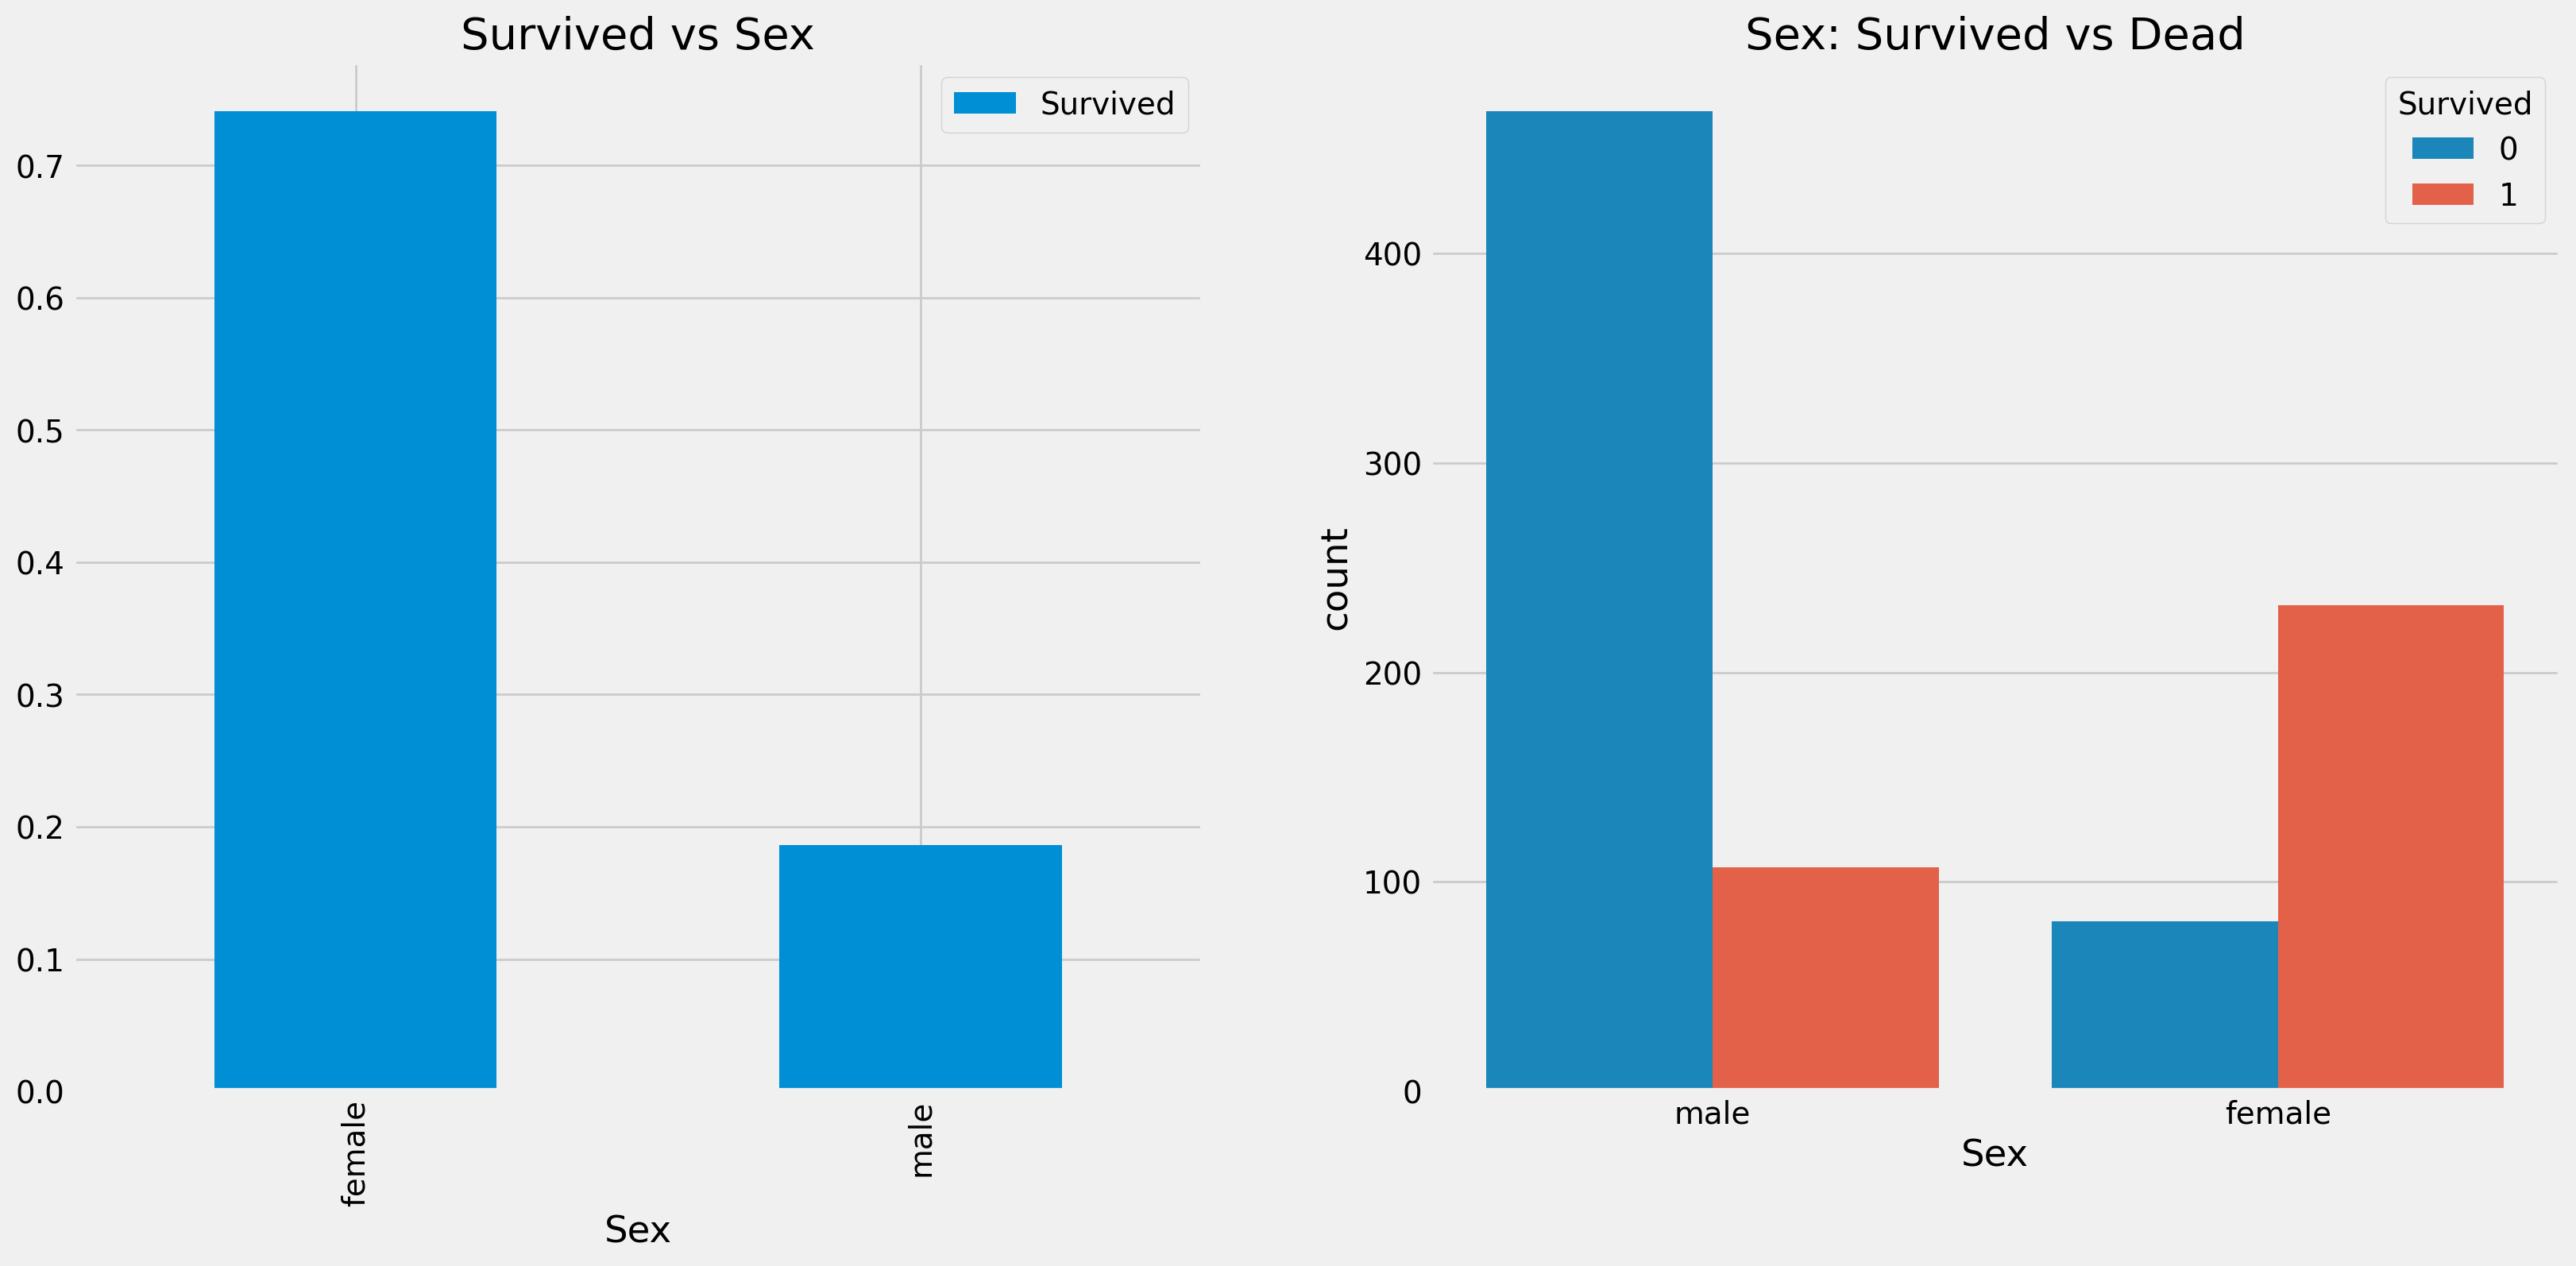

In [32]:
# Create figure to store visualization
f, ax = plt.subplots(1, 2, figsize=(18, 8))
train_df[['Sex', 'Survived']].groupby(['Sex']).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived vs Sex')
sns.countplot(x='Sex', hue='Survived',data=train_df, ax=ax[1])
ax[1].set_title('Sex: Survived vs Dead')
plt.show()

As we can see, there are more men on board. However, the survivors are mostly women.

Maybe this happen because women are often the priority in emergency situations

## 4.2. Pclass <a id = "4.2"></a>

In [33]:
pd.crosstab(train_df.Pclass, train_df.Survived,margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Pclass,,,
1,80,133,213
2,97,87,184
3,372,119,491
All,549,339,888


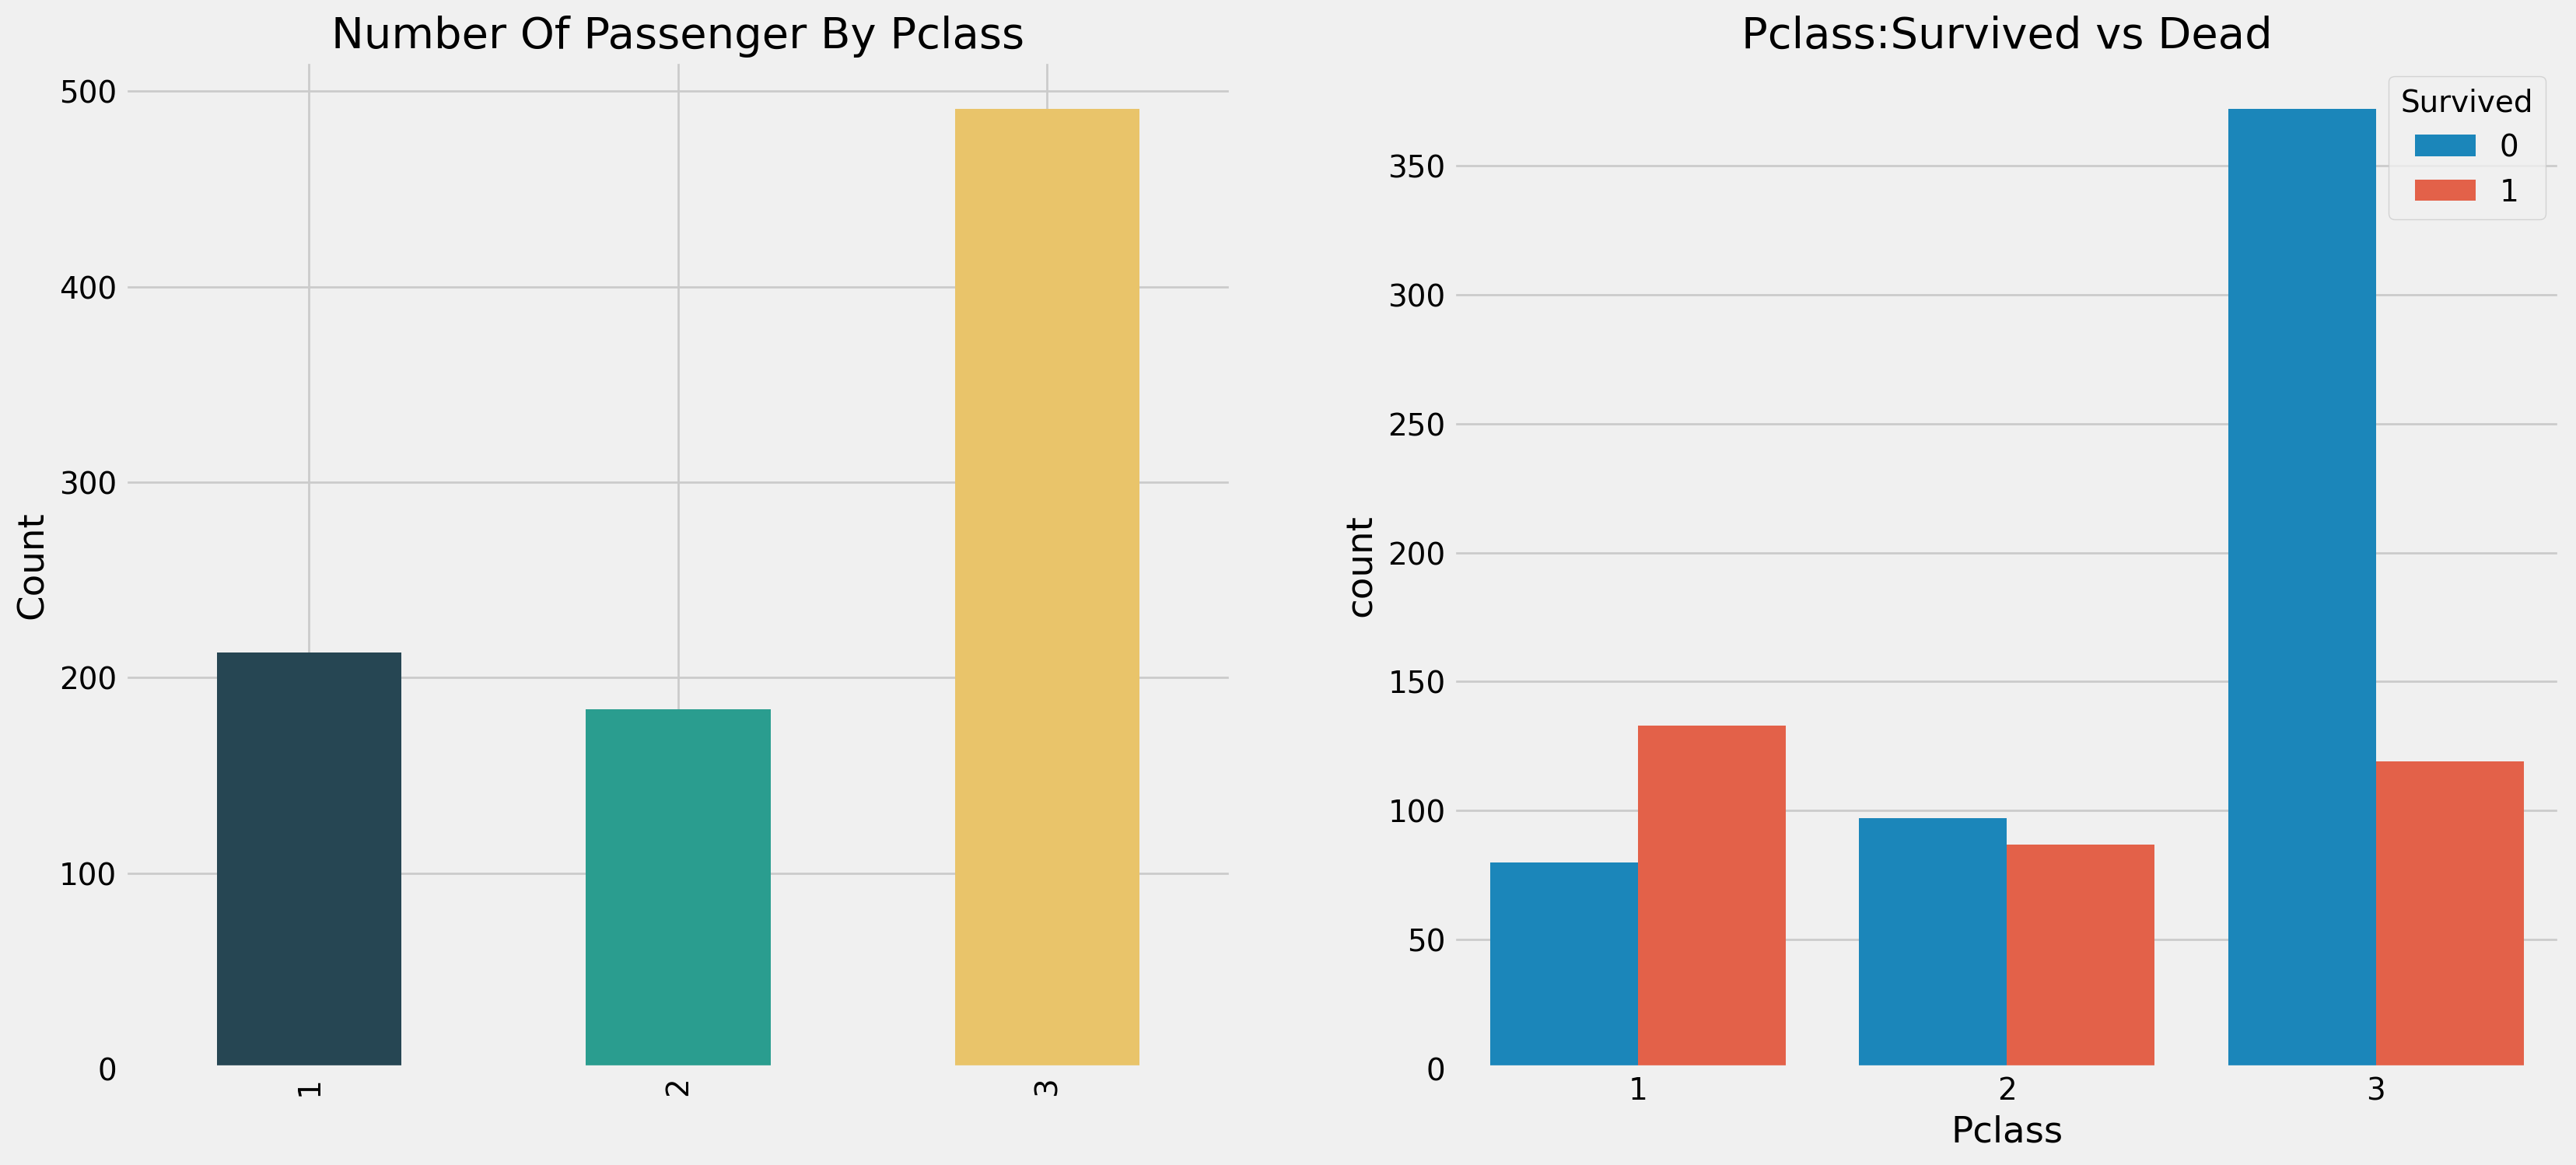

In [34]:
f, ax = plt.subplots(1,2, figsize=(18,8))
train_df['Pclass'].value_counts().sort_index().plot.bar(color=['#264653','#2A9D8F','#E9C46A'], ax=ax[0])
ax[0].set_title('Number Of Passenger By Pclass')
ax[0].set_ylabel('Count')
sns.countplot(x='Pclass',hue='Survived',data=train_df,ax=ax[1])
ax[1].set_title('Pclass:Survived vs Dead')
plt.show()

Money can't buy everything, they say. But on the Titanic, Pclass 1 passengers got the royal treatment during the rescue! This can be seen from the survival rate of **Pclass 1 which has the highest survival rate among the others, around 61.93%**🚢💫

Surprisingly, even with more people in **Pclass 3**, their survival rate was low, around **25.78%**. 😕

Pclass 1 had a 61.93% survival rate, while **Pclass 2** was close at **47.28%**. Money and status did matter, huh? 💰

Now, let's dive deeper! Time to check the survival rate by Sex and Pclass together. Let's uncover more interesting stuff! 😄🔍

In [35]:
pd.crosstab([train_df.Sex,train_df.Survived], train_df.Pclass, margins=True).style.background_gradient(cmap='summer_r')

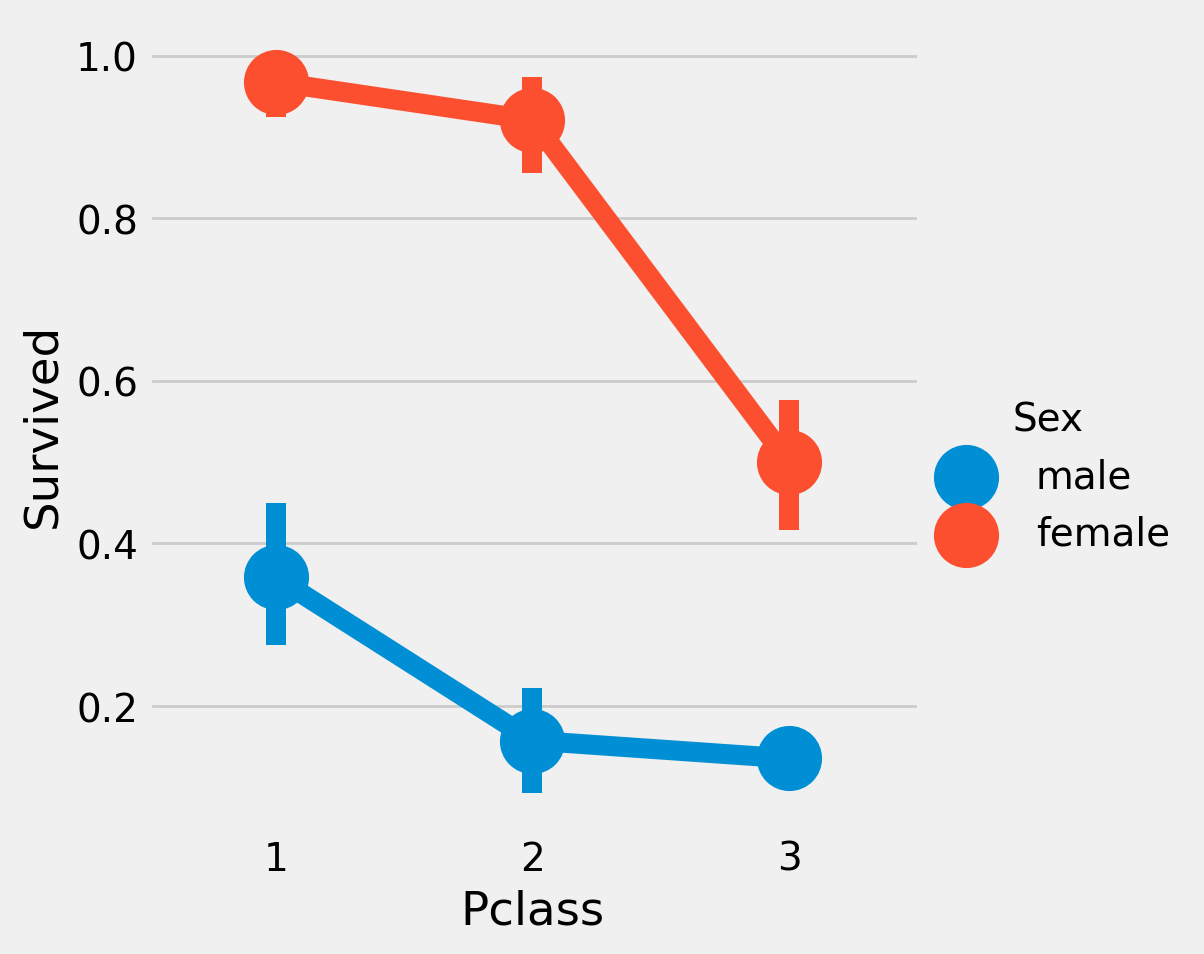

In [36]:
sns.catplot(x='Pclass',y='Survived',hue='Sex',data=train_df, kind='point')
plt.show()

If we look at the cross tab above, it can be concluded that passengers with the **highest survival rate** are **female passengers in the upper class (Pclass 1)** with a survival rate of around **96.81%**

On the other hand, passengers with the **lowest survival rat**e are **male passengers who are in the lower class (Pclass 3)** with a survival rate of around **14.24%**.

Then if we look at the catplot regardless of class, female passengers are the priority when incidents occur

## 4.3. Age <a id = "4.3"></a>

In [37]:
train_df.Age.describe()

count    888.000000
mean      29.762445
std       13.297793
min        0.420000
25%       21.771812
50%       30.000000
75%       35.981818
max       80.000000
Name: Age, dtype: float64

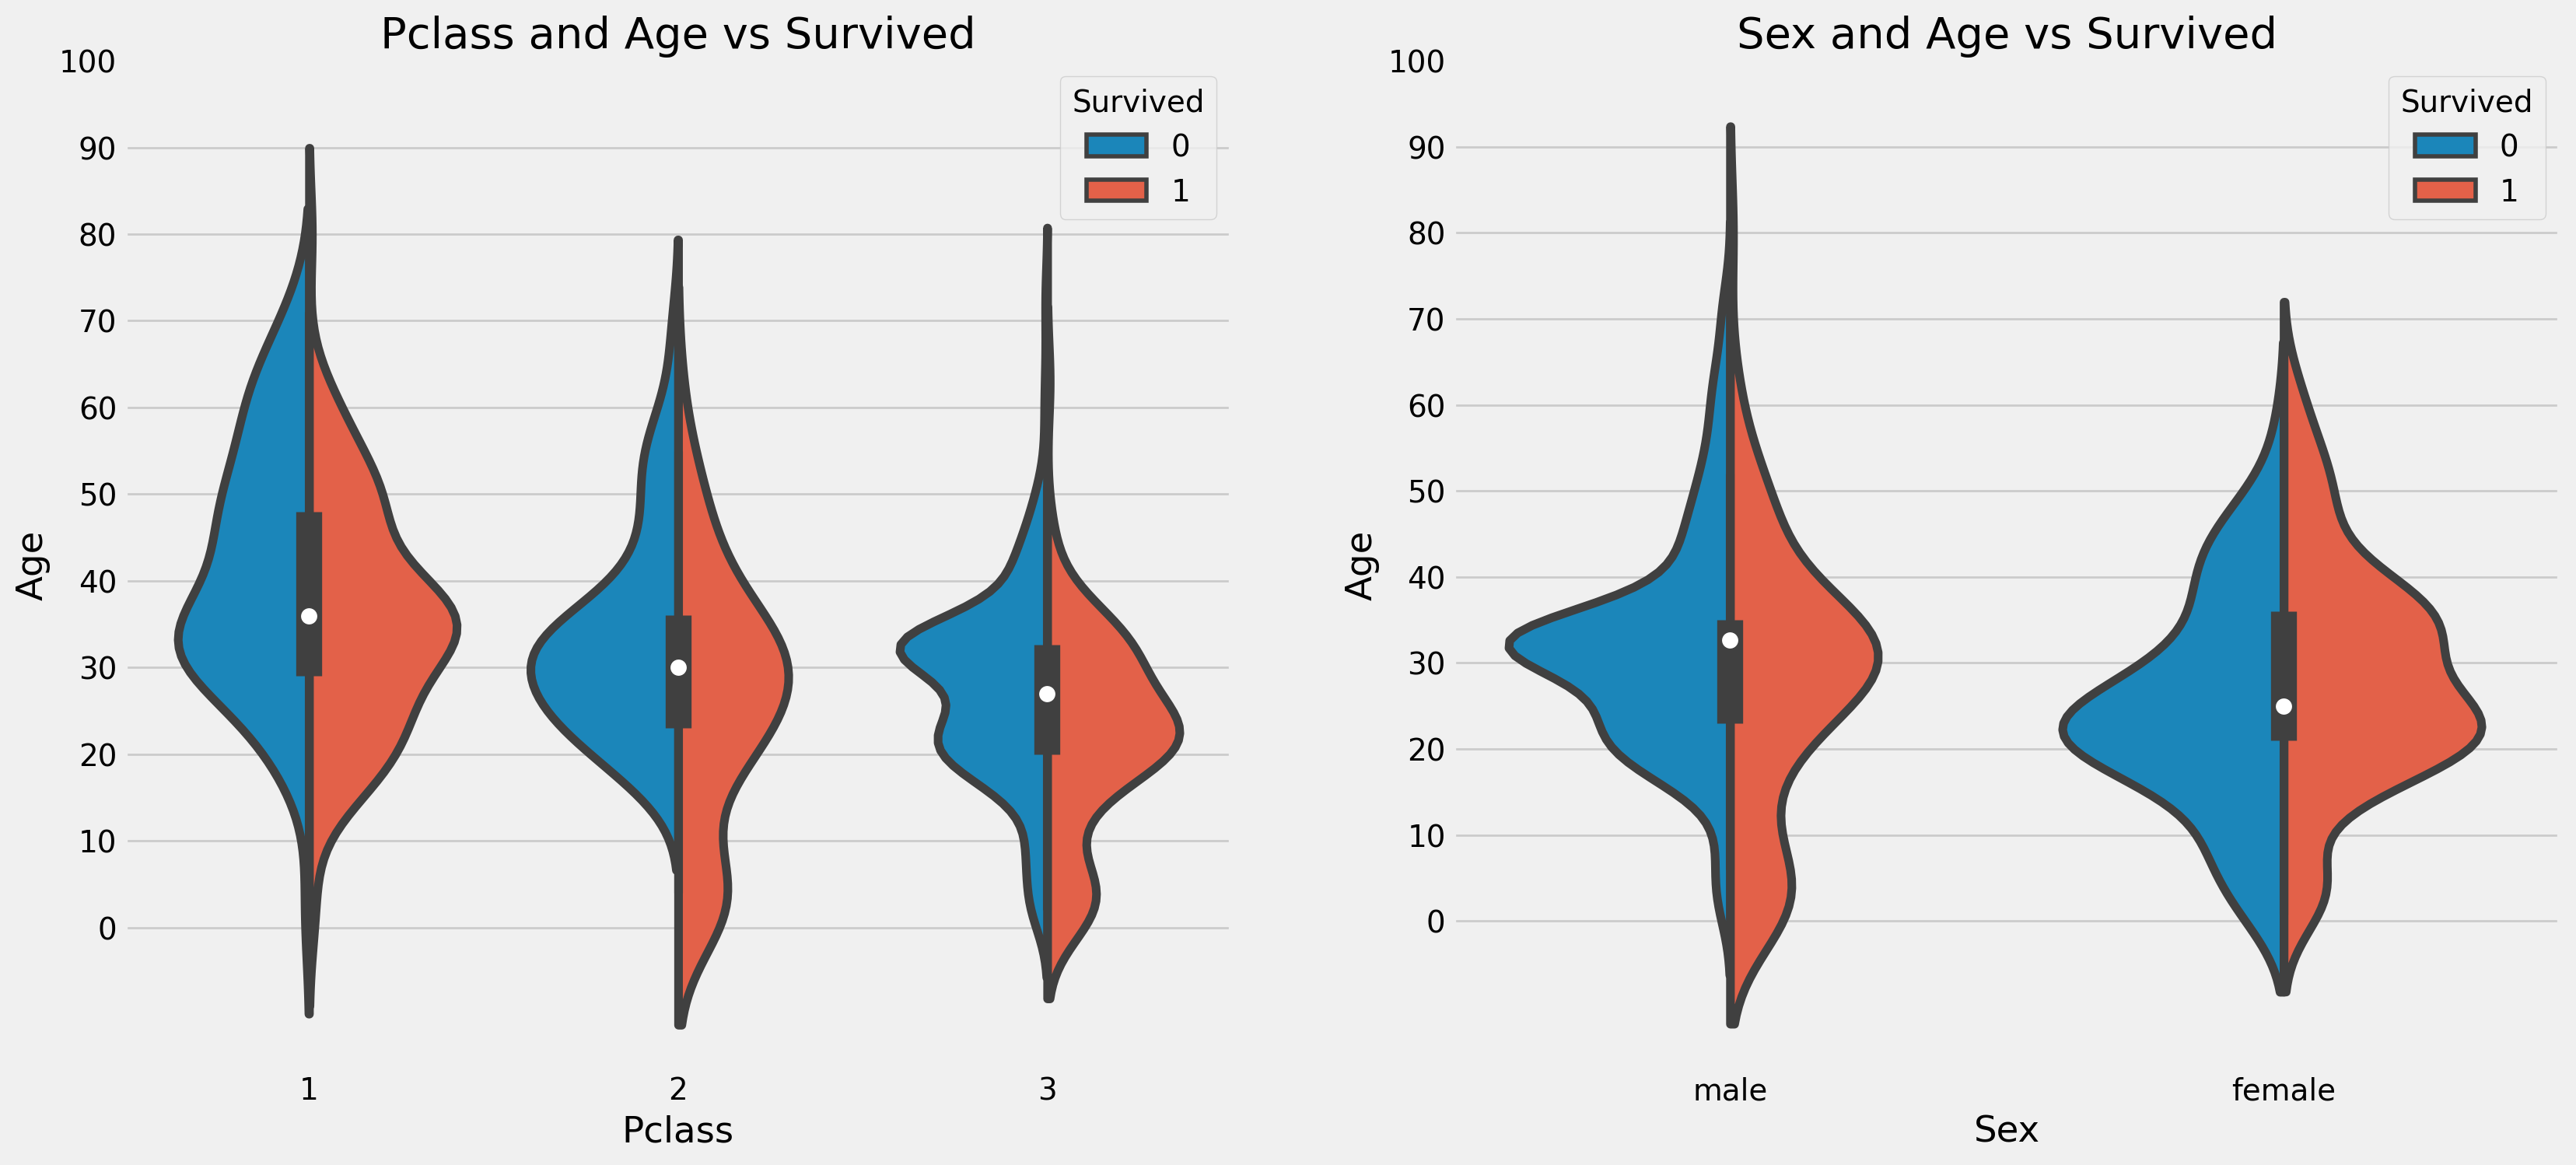

In [38]:
f, ax = plt.subplots(1,2, figsize=(18,8))
sns.violinplot(x="Pclass", y="Age", hue="Survived", data=train_df, split=True, ax=ax[0])
ax[0].set_title("Pclass and Age vs Survived")
ax[0].set_yticks(range(0,110,10))
sns.violinplot(x="Sex", y="Age", hue="Survived", data=train_df, split=True, ax=ax[1])
ax[1].set_title("Sex and Age vs Survived")
ax[1].set_yticks(range(0,110,10))

plt.show()

Based on the graph above, we can see that **children are a priority for rescue**. This relates to the "put women and children first" policy.

## 4.4 Embarked <a id = "4.4"></a>

In [39]:
pd.crosstab([train_df.Embarked,train_df.Pclass], [train_df.Sex,train_df.Survived], margins=True).style.background_gradient(cmap='summer_r')

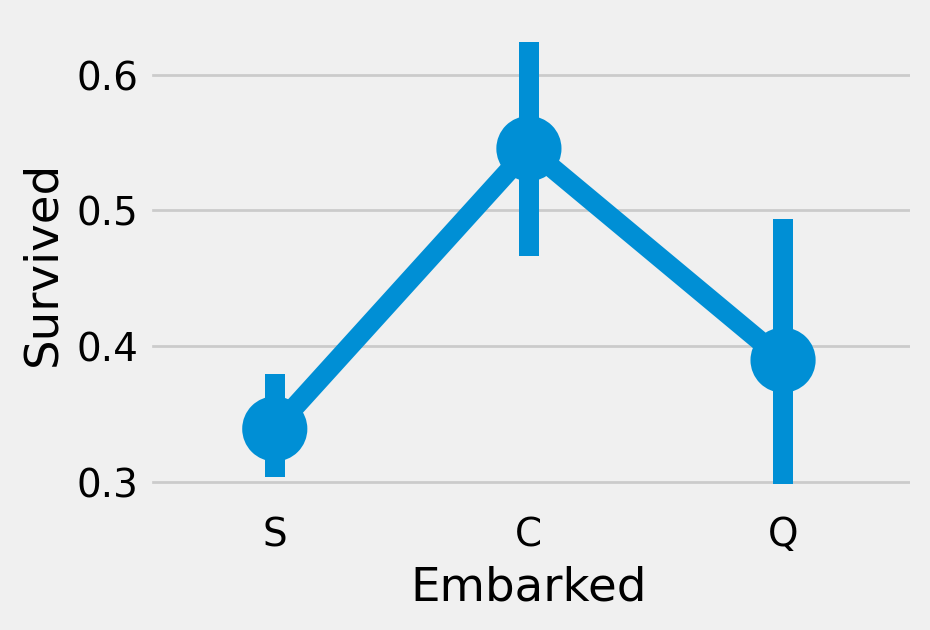

In [40]:
sns.catplot(x="Embarked", y="Survived", data=train_df, kind='point')
fig=plt.gcf()
fig.set_size_inches(5,3)
plt.show()

The highest survival rate based on Passenger Embarked are **C** with sruvival rate around **53.9%**. Now let's see another visualization if we add another feature to embarked feature

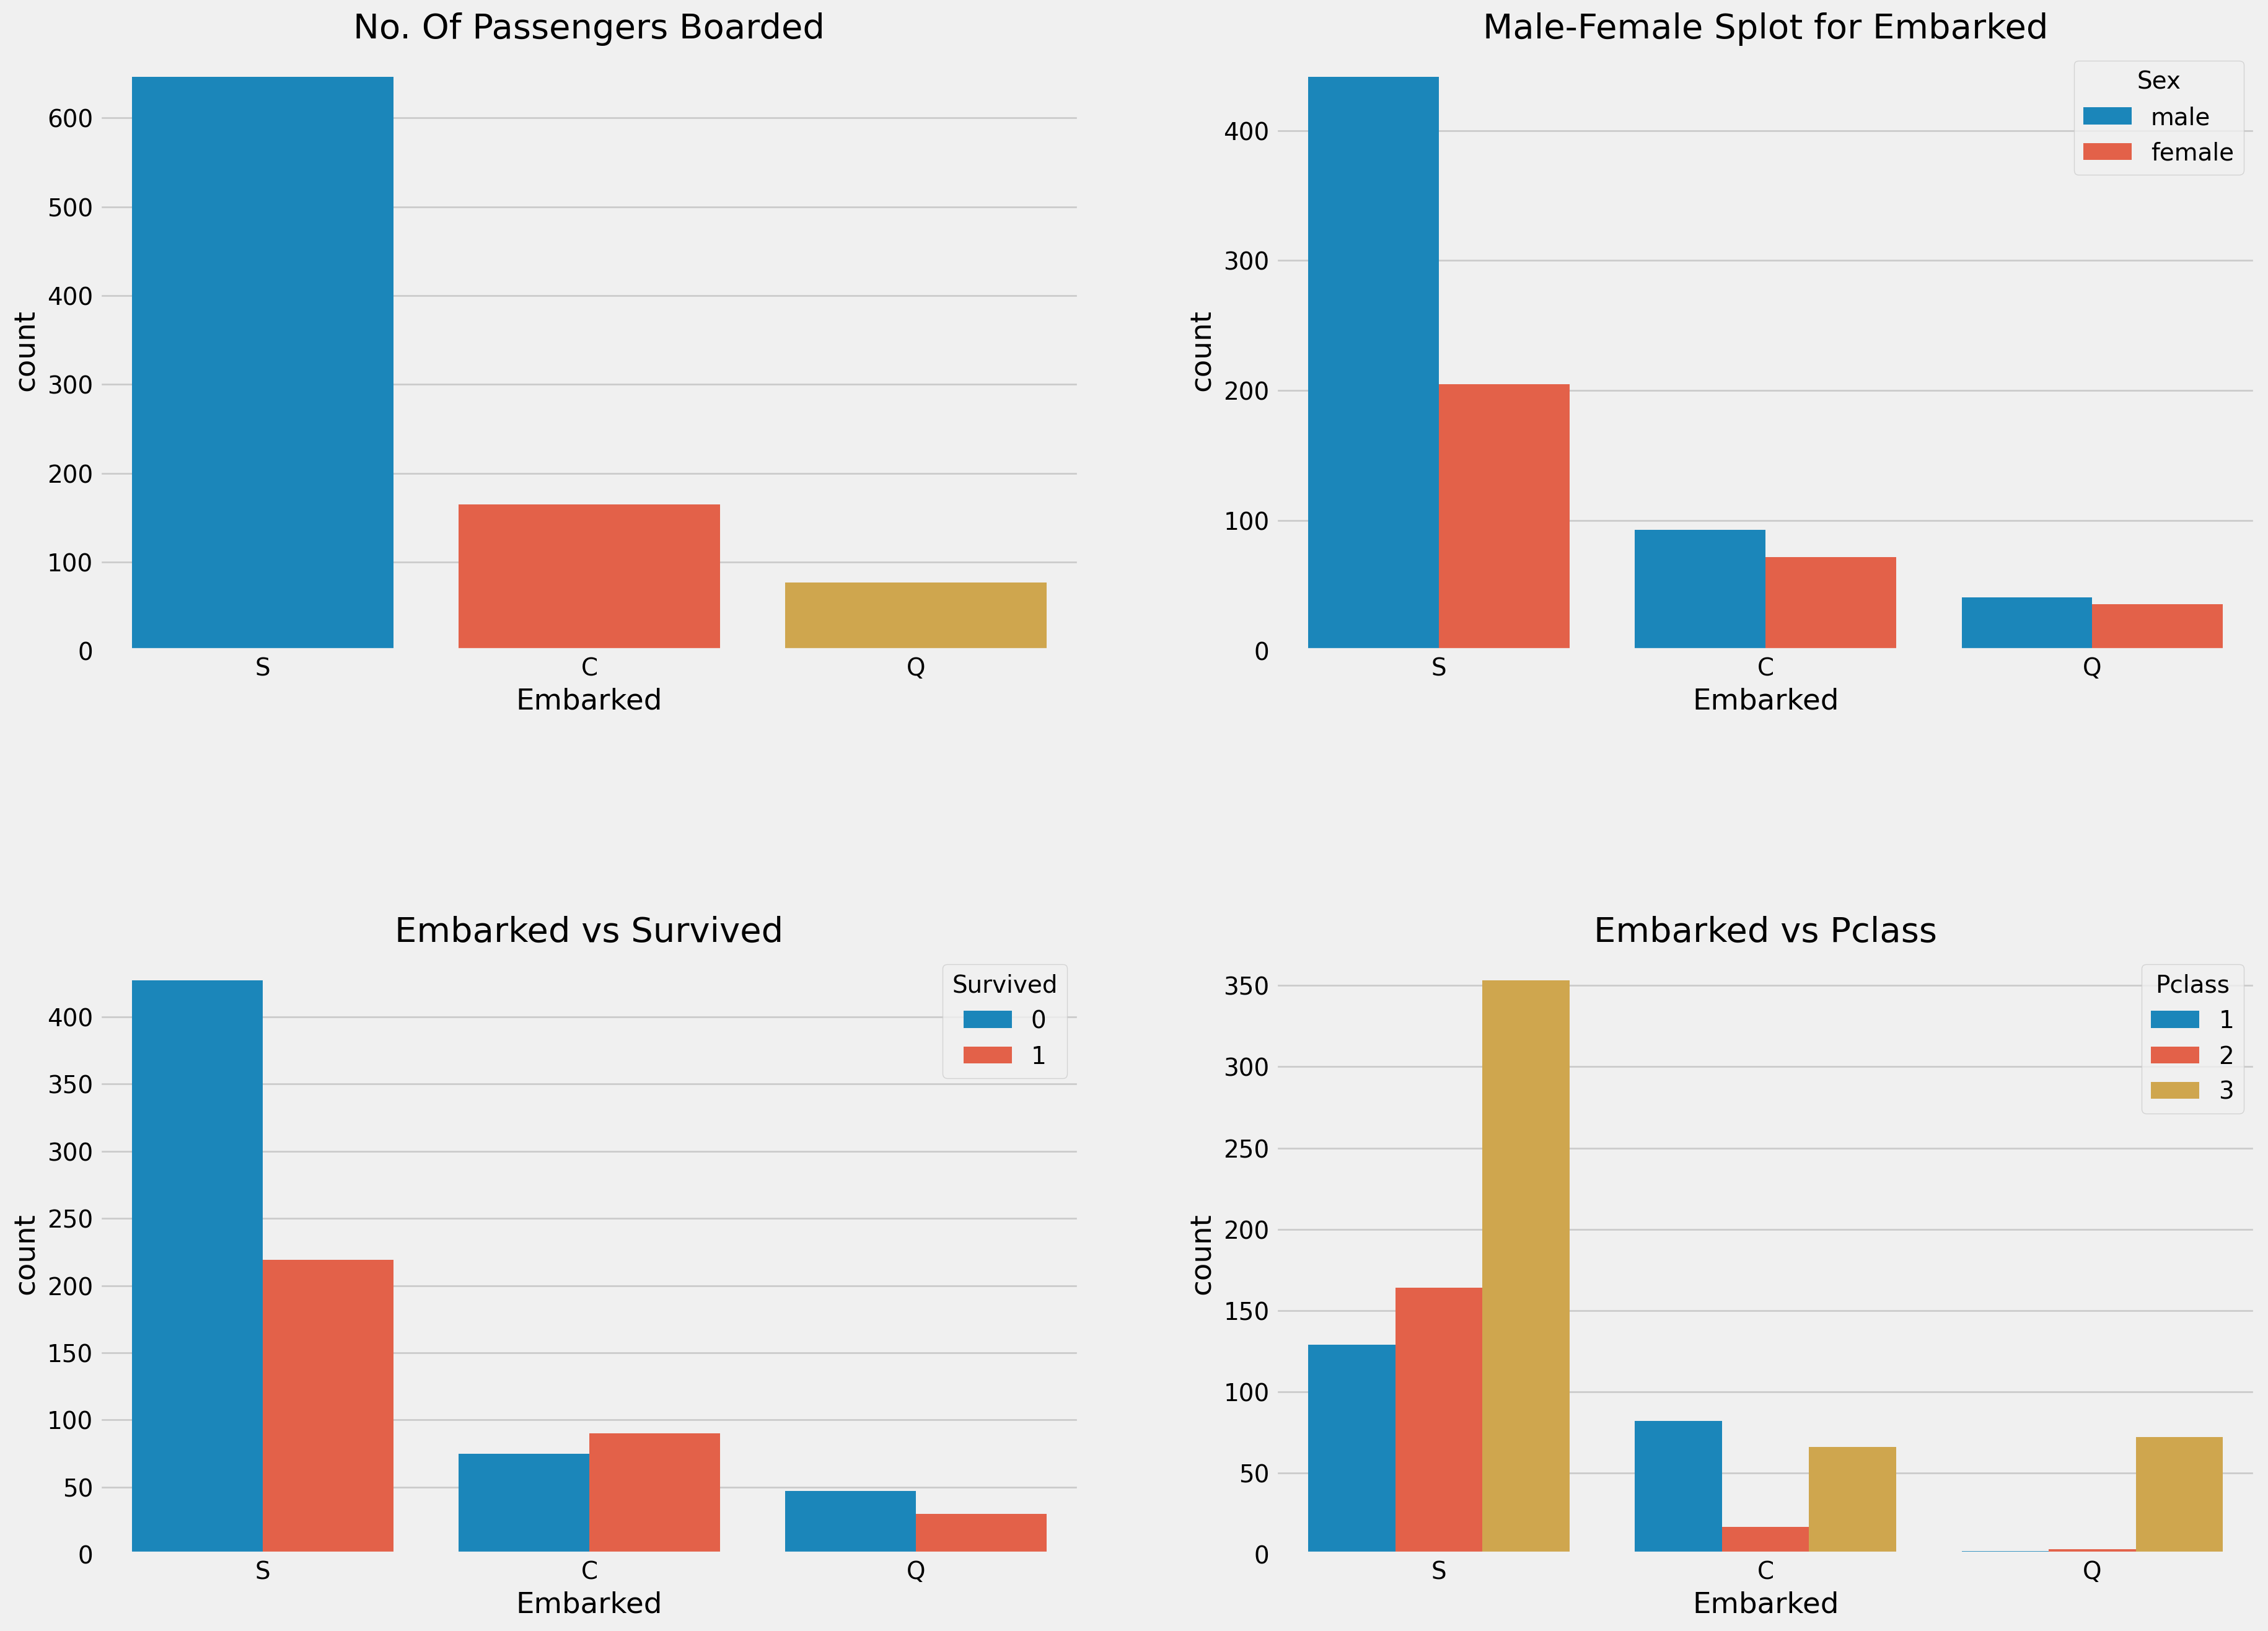

In [41]:
f, ax =plt.subplots(2,2, figsize=(20,15))
sns.countplot(x='Embarked', data=train_df, ax=ax[0,0])
ax[0,0].set_title('No. Of Passengers Boarded')
sns.countplot(x='Embarked',hue='Sex', data=train_df, ax=ax[0,1])
ax[0,1].set_title('Male-Female Splot for Embarked')
sns.countplot(x='Embarked', hue='Survived', data=train_df, ax=ax[1,0])
ax[1,0].set_title('Embarked vs Survived')
sns.countplot(x='Embarked', hue='Pclass', data=train_df, ax=ax[1,1])
ax[1,1].set_title('Embarked vs Pclass')
plt.subplots_adjust(wspace=0.2,hspace=0.5)
plt.show()

**Key Findigs**:
1. The majority of passengers boarded from a place called **"S"**. Most of them were in **Pclass 3**.
2. Passengers who embarked from **"C"** seem to quite lucky, as good number of them survived. Embarkation point **"C"** also being the only one departure that had more survivor than non survivors. One possible reason could be the rescue of all **Pclass 1** and **Pclass 2** passengers.
3. Embarkation point **"S"** attracted many rich people , but unfortunately, the survival rate was low. This could be because **79.75%** of **Pclass 3** didn't make it.
4. Port **"Q"** was dominated by **Pclass 3** passengers, making almost **90.67%** of the total

Let's now look at the survival rate for each point of departure and sex

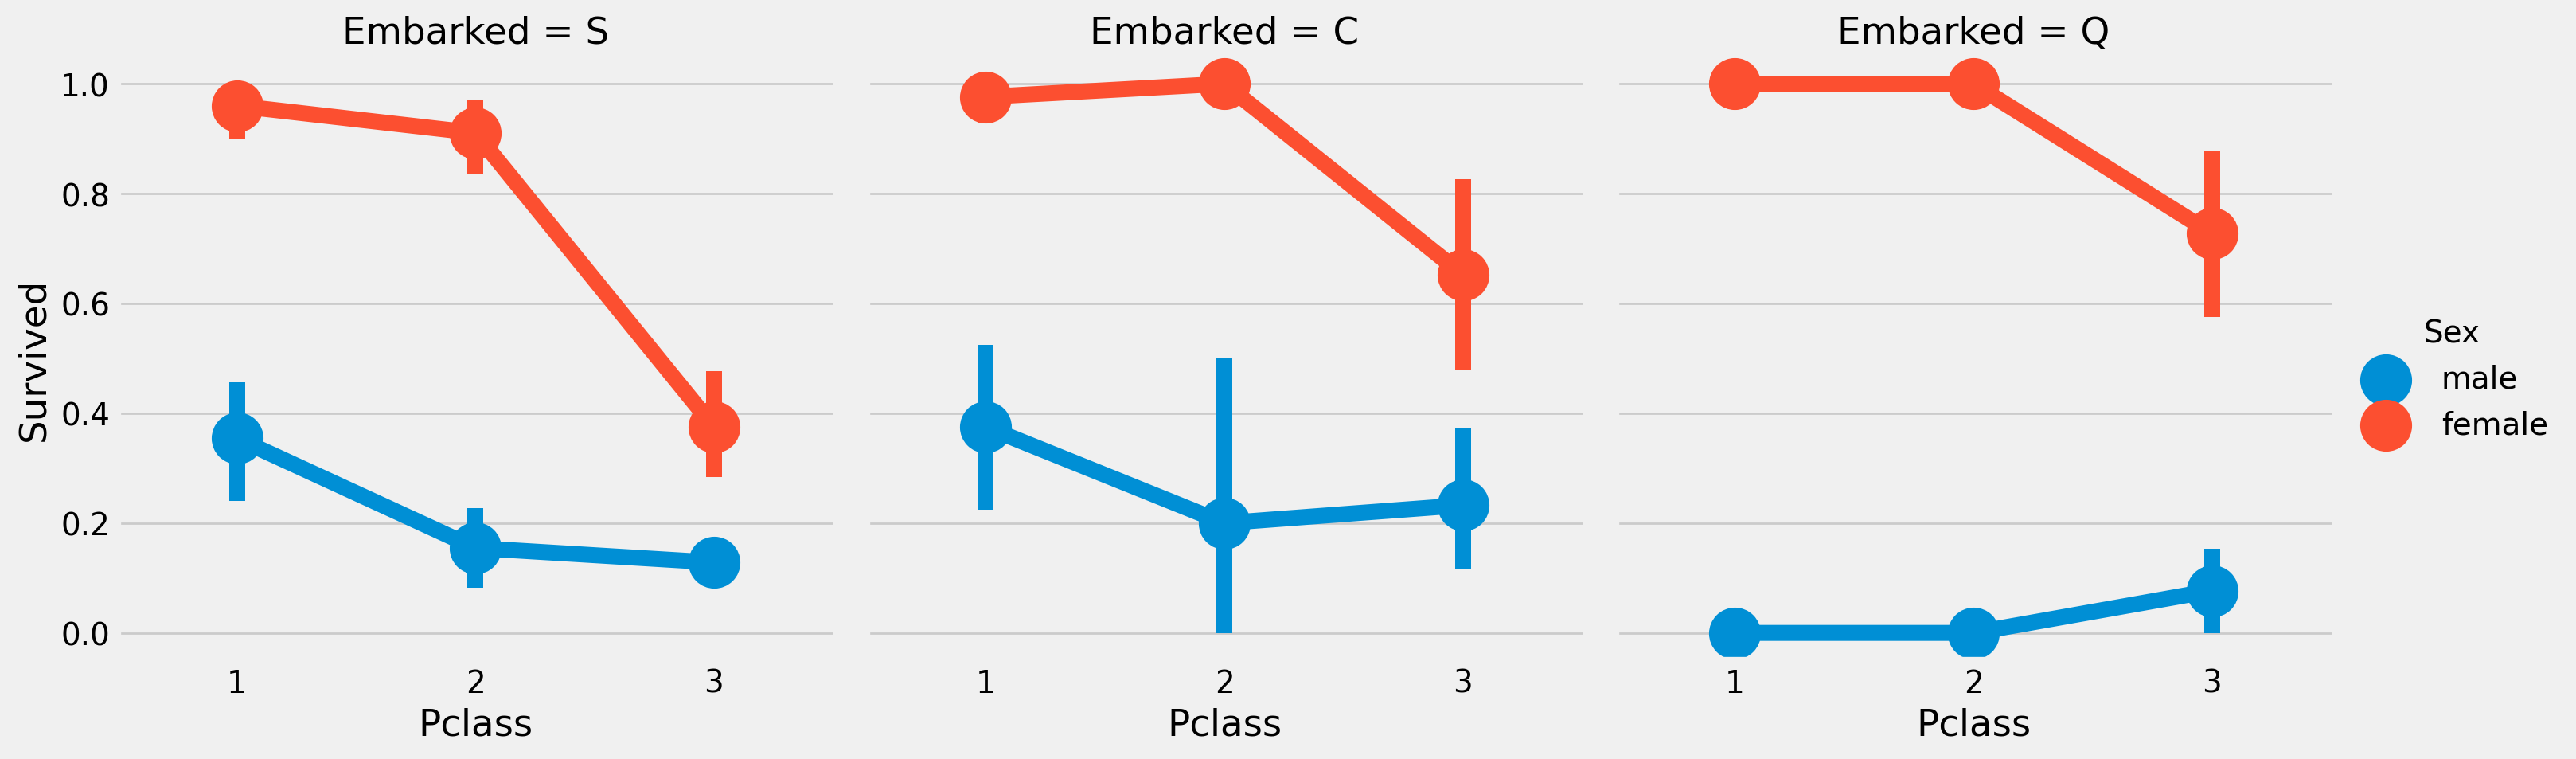

In [42]:
sns.catplot(x='Pclass', y='Survived', hue='Sex', col='Embarked', data=train_df, kind='point')
plt.show()

**Key Findings**:
1. Amazing news for the ladies! Whether you were in **Pclass 1** or **Pclass 2**, your survival chances were sky-high, nearly cloase 100%
2. Oh, Port **"S"**, what's up with the bad luck? **Pclass 3** passengers had a rough time, both men and women. Survival rates were pretty low. Money can be a real game-changer, huh? 💸😕
3. For male passengers, Port **"Q"** appeared to be the least fortunate. The survival rate was markedly low, leaving little room for optimism

## 4.5. SibSp <a id = "4.5"></a>

In [43]:
pd.crosstab([train_df.SibSp],[train_df.Survived]).style.background_gradient(cmap='summer_r')

Survived,0,1
SibSp,,
0,398,207
1,97,112
2,15,13
3,12,4
4,15,3
5,5,0
8,7,0


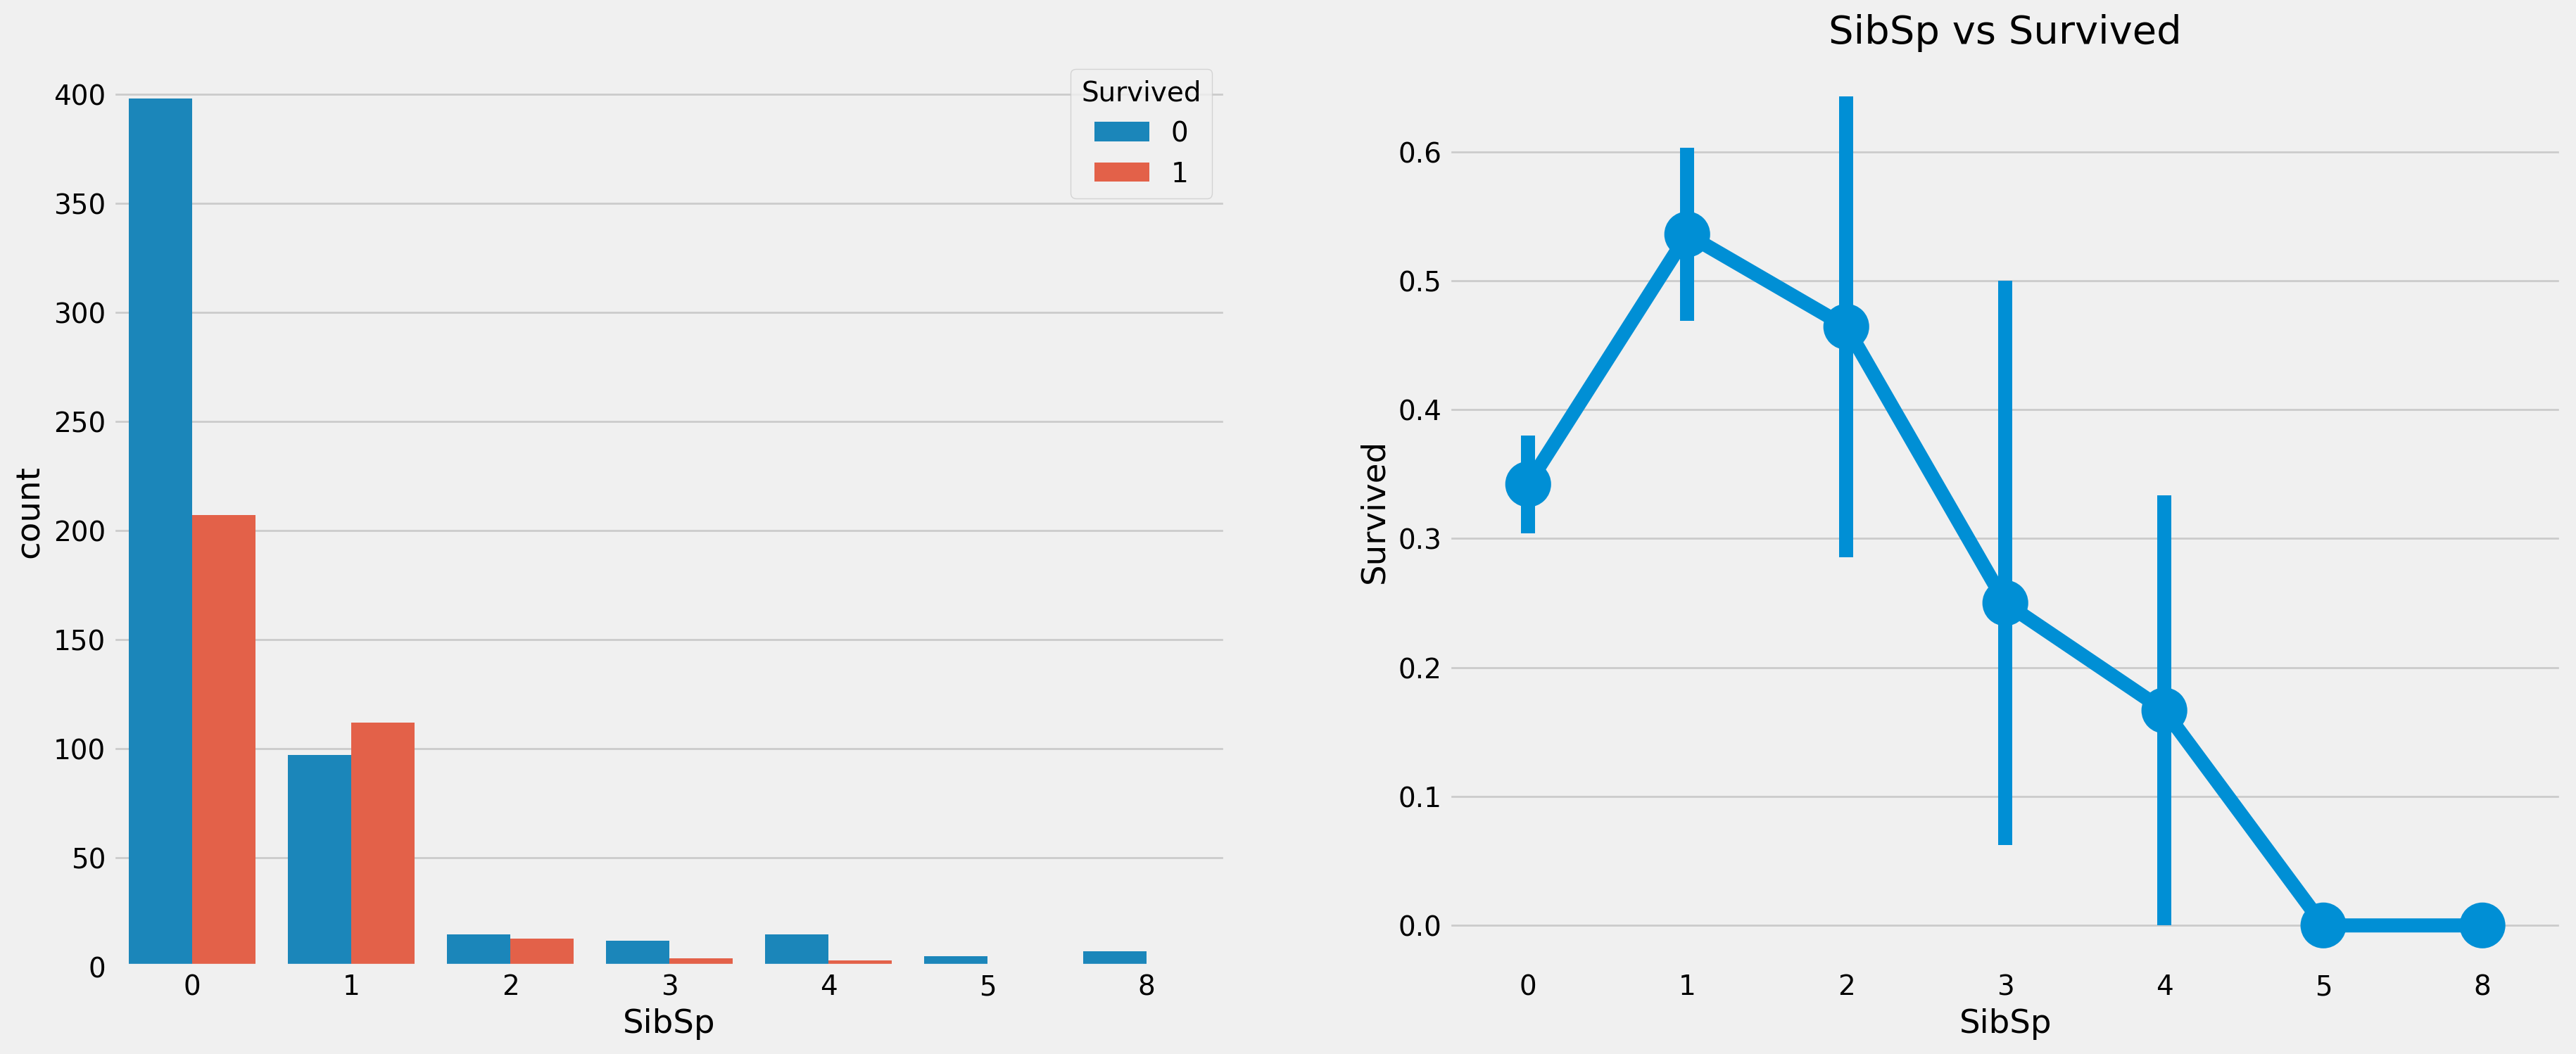

In [44]:
f, ax = plt.subplots(1, 2, figsize=(20, 8))

sns.countplot(x='SibSp', hue='Survived', data=train_df, ax=ax[0])
ax[1].set_title('SibSp vs Survived')

sns.pointplot(x='SibSp', y='Survived', data=train_df, ax=ax[1])
ax[1].set_title('SibSp vs Survived')

plt.show()

In [45]:
pd.crosstab(train_df.SibSp,train_df.Pclass).style.background_gradient(cmap='summer_r')

Pclass,1,2,3
SibSp,,,
0,134,120,351
1,71,55,83
2,5,8,15
3,3,1,12
4,0,0,18
5,0,0,5
8,0,0,7


## 4.6. Parch <a id = "4.6"></a>

In [46]:
pd.crosstab(train_df.Parch, train_df.Pclass).style.background_gradient(cmap='summer_r')

Pclass,1,2,3
Parch,,,
0,161,134,381
1,30,32,55
2,21,16,43
3,0,2,3
4,1,0,3
5,0,0,5
6,0,0,1


Once again, the crosstab reaffirms that larger families tended to be in Pclass 3.

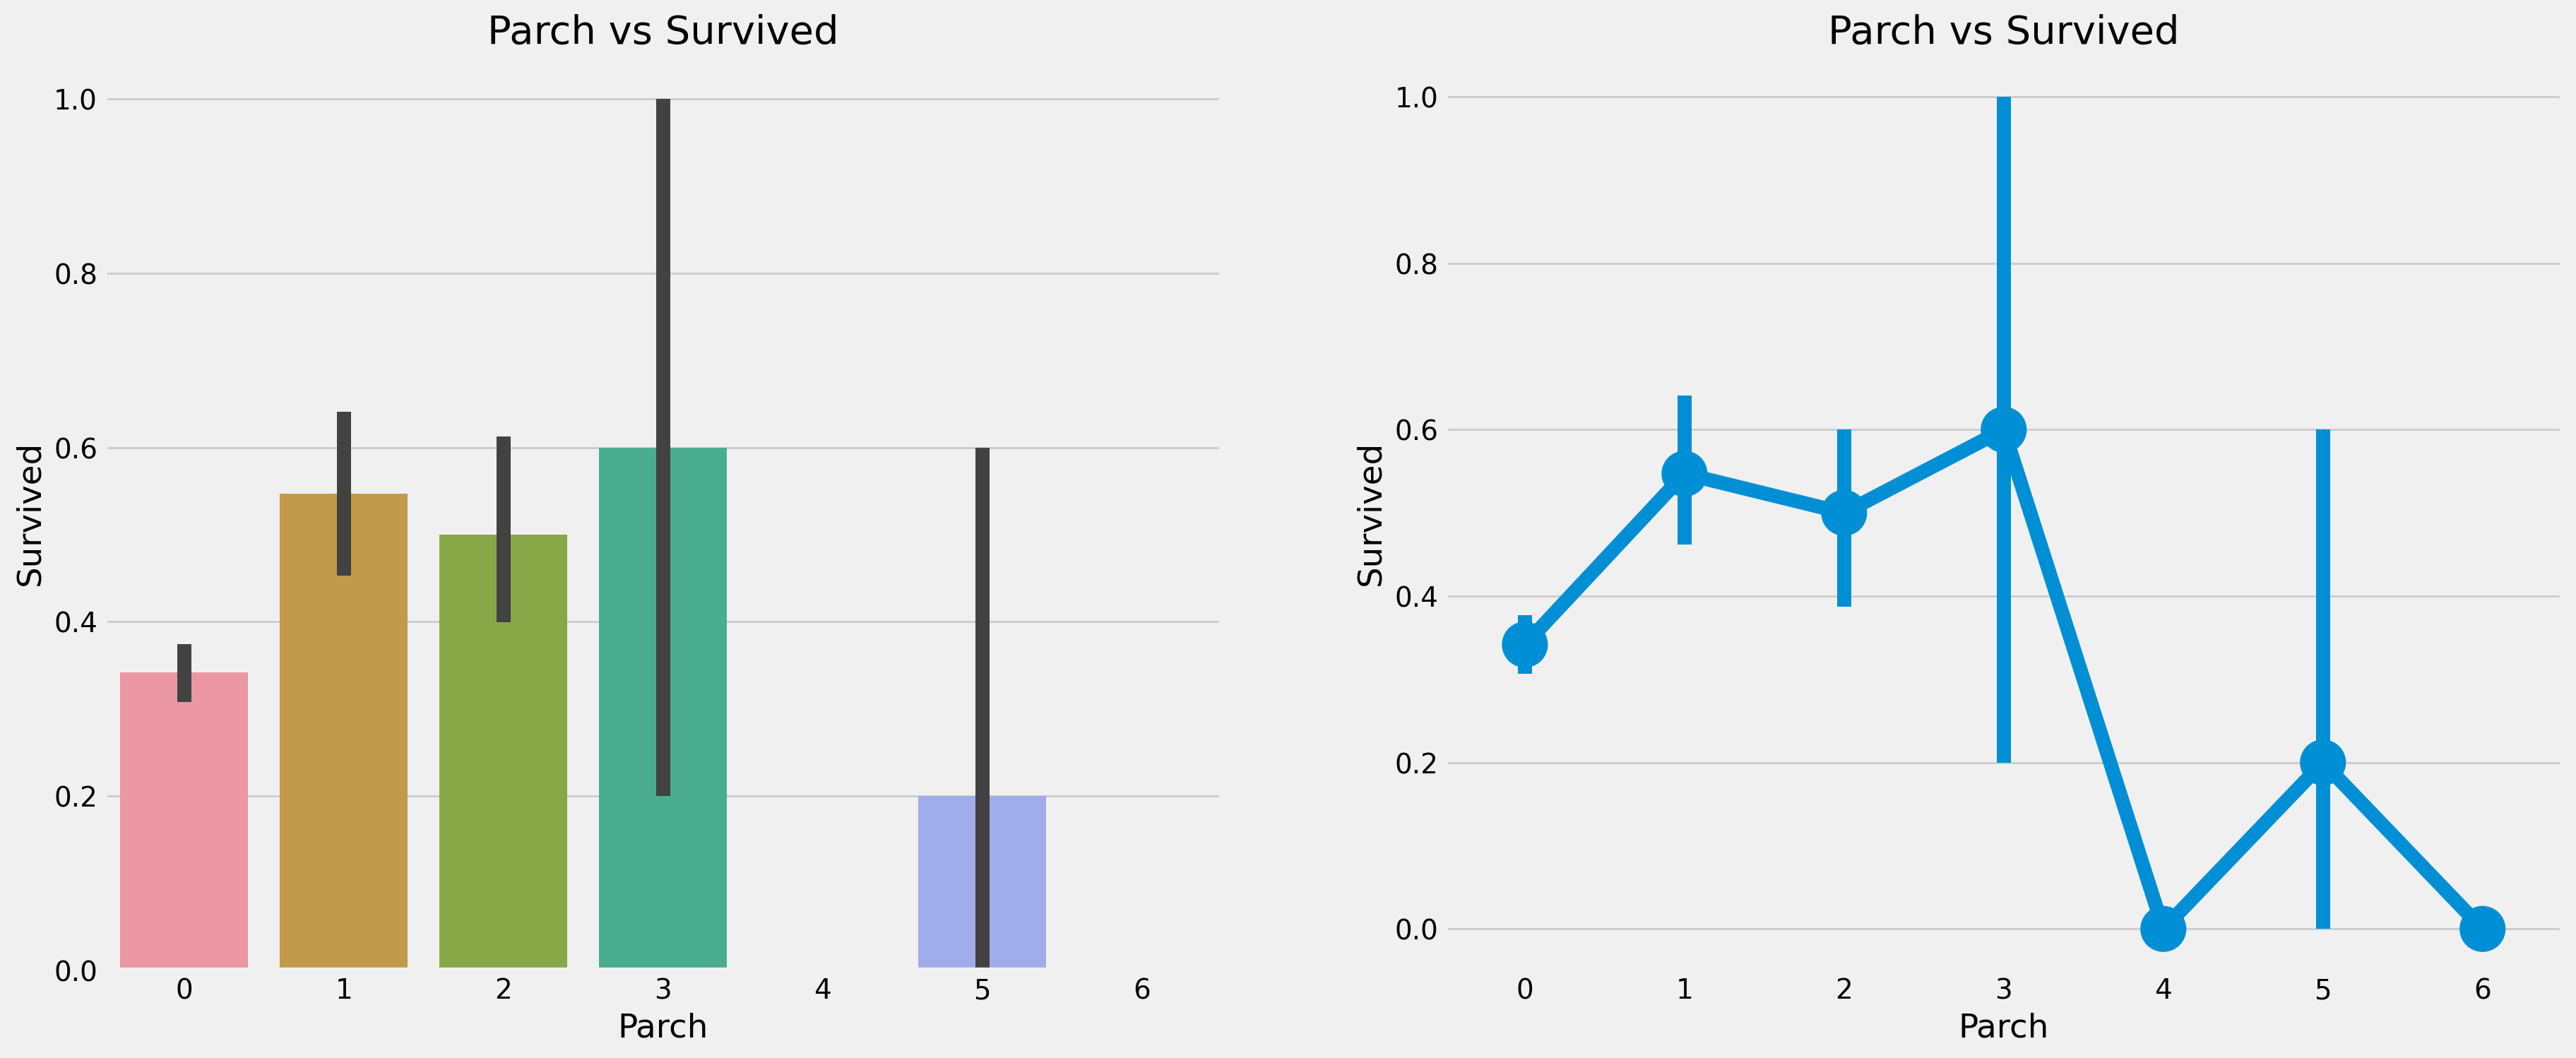

In [47]:
f, ax = plt.subplots(1,2,figsize=(20,8))
sns.barplot(x= 'Parch',y= 'Survived', data = train_df, ax=ax[0])
ax[0].set_title('Parch vs Survived')
sns.pointplot(x='Parch', y= 'Survived', data= train_df, ax=ax[1])
ax[1].set_title('Parch vs Survived')
plt.show()

**Key Findings:**

1. Similar patterns emerge here as well. Pessenger who had their parents on board had a higher chance of survival. However this likelihood decreases as the number of parents onboard increases.

2. The probability of survival is favorable for individuals with 1-3 parents on the ship . Conversely, traveling alone seems to be associated with o lower chance of survival, and the survival rate diminishes when someone has more than 4 parents on the ship

## 4.7. Fare <a id = "4.7"></a>

In [48]:
train_df.Fare.describe()

count    888.000000
mean      30.582164
std       41.176366
min        0.000000
25%        7.895800
50%       14.454200
75%       30.771850
max      263.000000
Name: Fare, dtype: float64

The lowest fare recorded is 0. Quite a surprising find – a complimentary, luxurious journey!

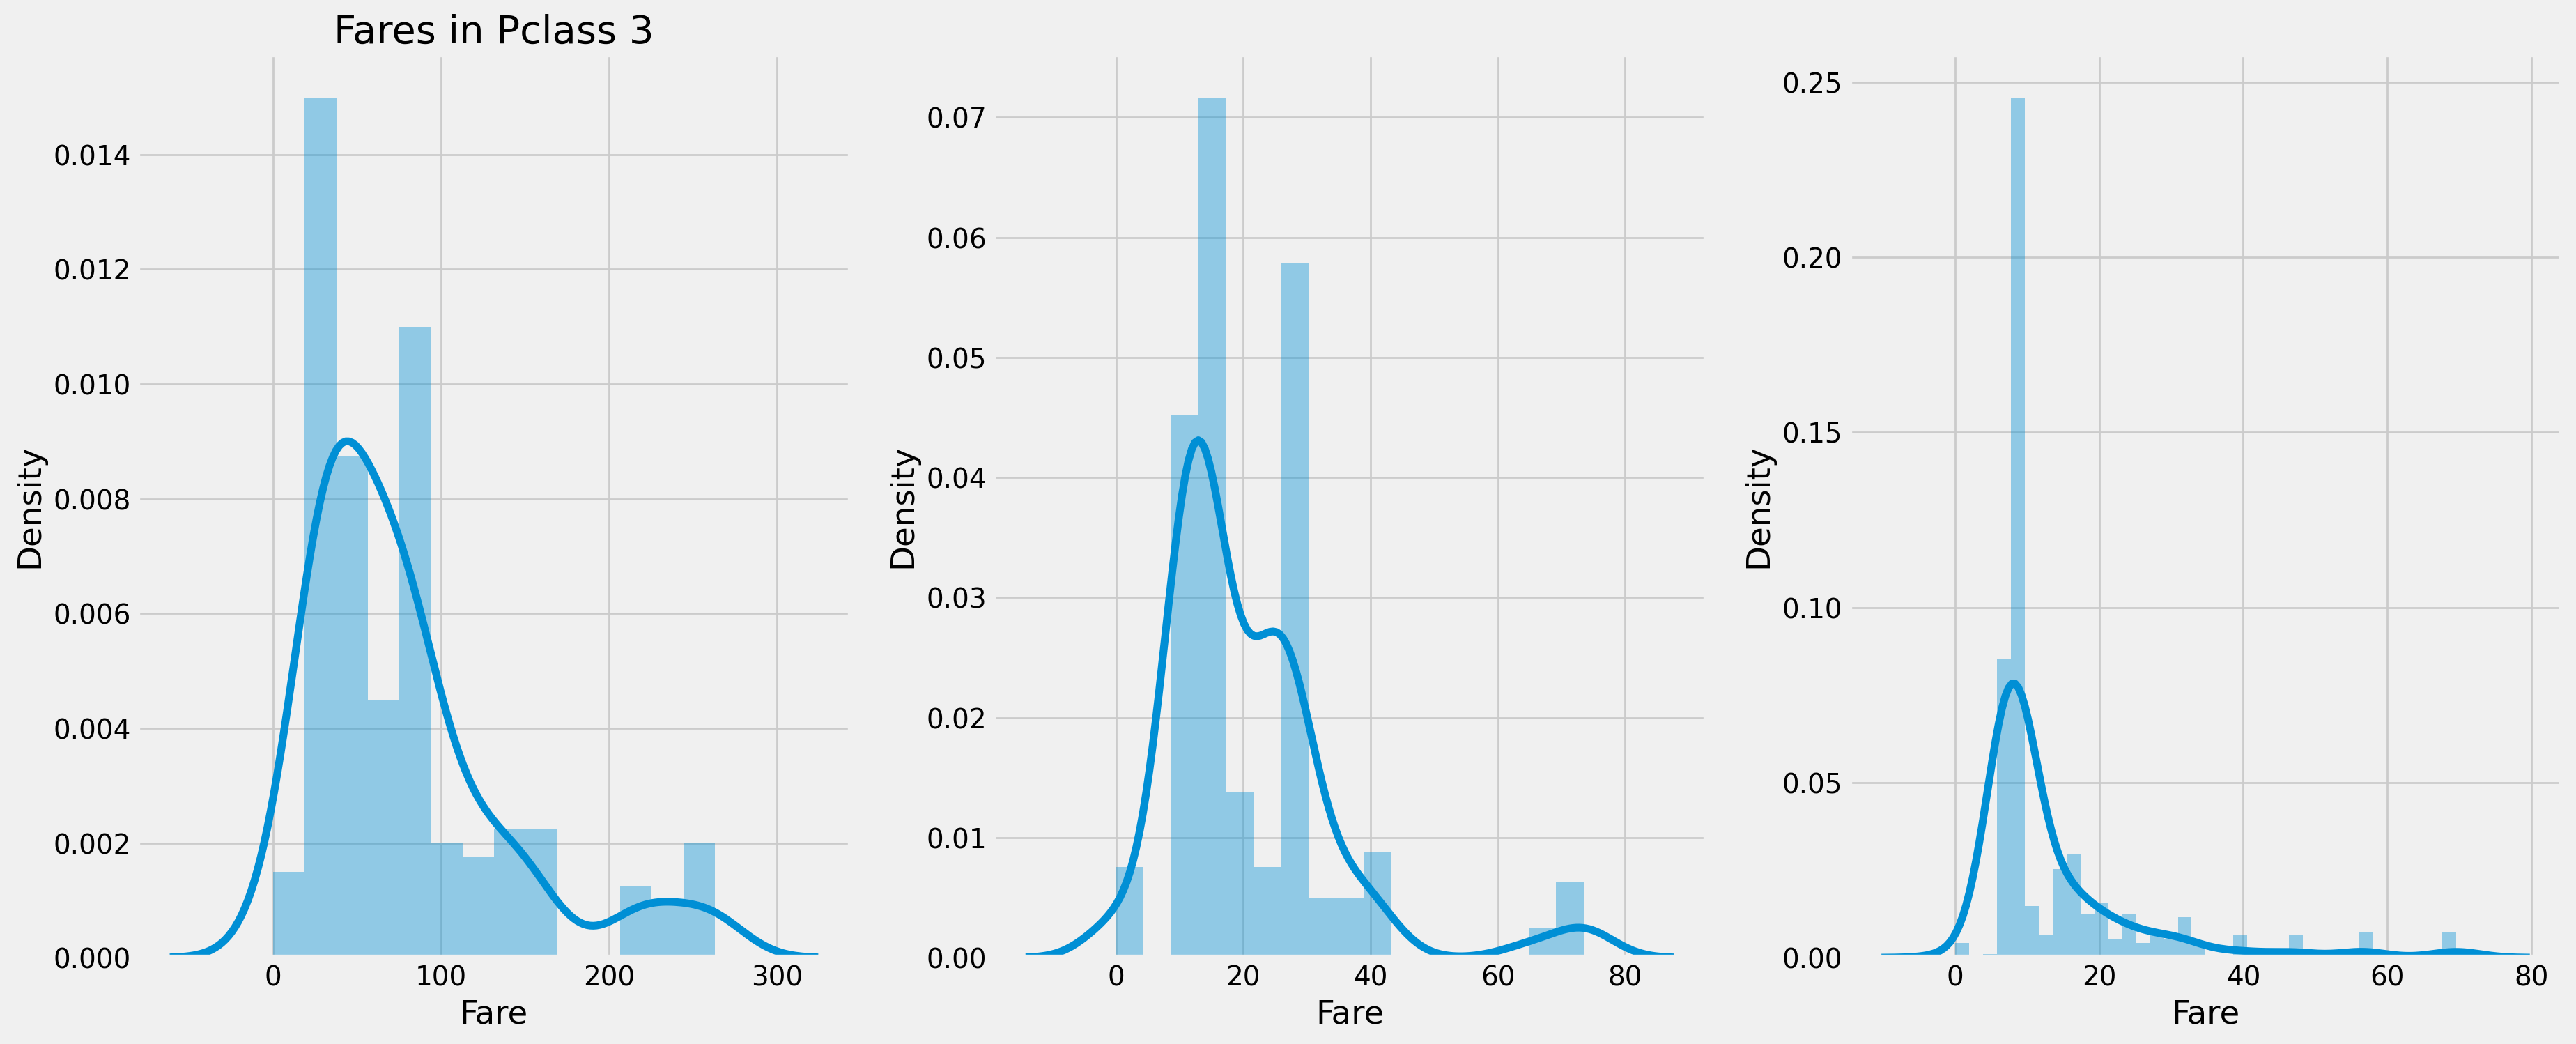

In [49]:
f, ax = plt.subplots(1,3,figsize=(20,8))
sns.distplot(train_df[train_df.Pclass ==1].Fare, ax=ax[0])
ax[0].set_title('Fares in Pclass 1')
sns.distplot(train_df[train_df.Pclass ==2].Fare, ax=ax[1])
ax[0].set_title('Fares in Pclass 2')
sns.distplot(train_df[train_df.Pclass ==3].Fare, ax=ax[2])
ax[0].set_title('Fares in Pclass 3')
plt.show()

We can observe a significant range in the fare distribution among passengers in Pclass 1, and this distribution progressively decreases as the class standards go down.

## 4.8. Observations summarized for all features: <a id = "4.8"></a>

- **Sex:** Women have a higher chance of survival compared to men.

- **Pclass:** A clear trend emerges – being a 1st class passenger increases your chances of survival. Pclass 3 has a notably low survival rate. For women, survival rates are nearly 1 for Pclass 1 and quite high for Pclass 2. It seems money matters!

- **Age:** Children under 5-10 years old have a significantly higher chance of survival. Passengers between the ages of 15 and 35 experienced higher mortality.

- **Embarked:** An intriguing pattern appears here. Even though the majority of Pclass 1 passengers embarked from S, the chances of survival at C appear better. Passengers at Q were exclusively from Pclass 3.

- **Parch+SibSp:** Traveling with 1-2 siblings/spouses or having 1-3 parents on board indicates a higher chance of survival, compared to traveling alone or with a larger family.

## 4.9. Correlation Between The Features <a id = "4.9"></a>

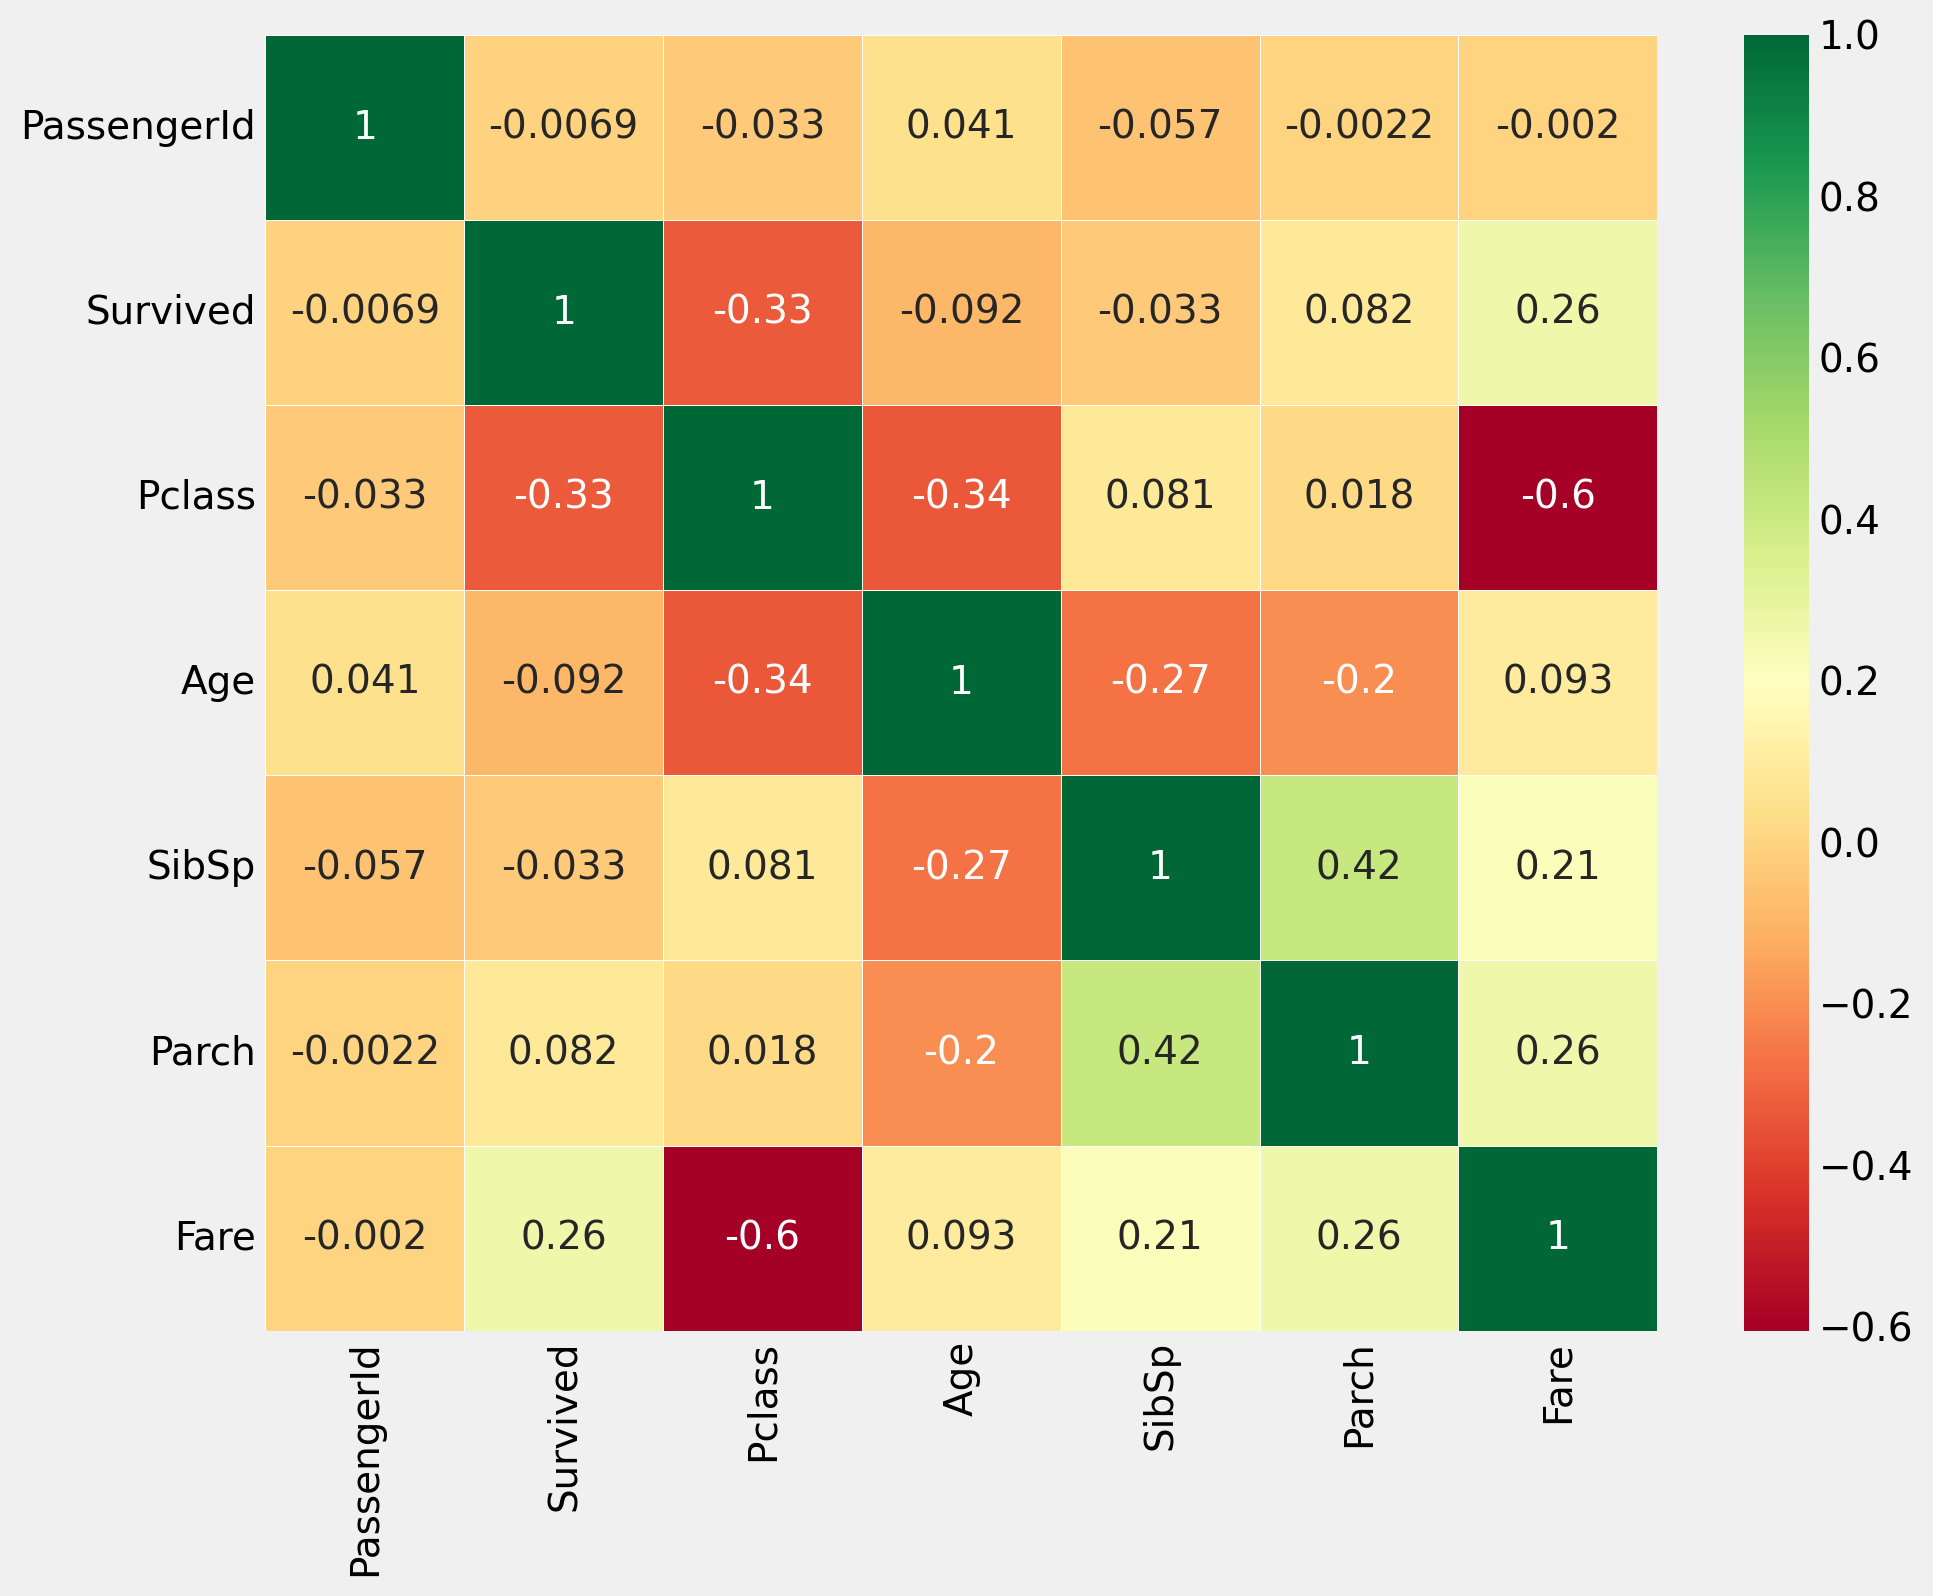

In [50]:
sns.heatmap(train_df.corr(), annot=True, cmap='RdYlGn',linewidths=0.2)
fig =plt.gcf()
fig.set_size_inches(10,8)
plt.show()

Looking at the heatmap above, it's evident that the features don't exhibit strong correlation with one another. The highest correlation coefficient observed is between `SibSp` and `Parch`, which is 0.42. Thus, based on this correlation analysis, there's no strong reason to eliminate any features. We can continue using all the features for our analysis.

# 5. Feature Engineering ⚙️ <a id = "5"></a>
Feature Engineering is exactly what it sound like. It's essentially the art of refining and optimizing the features in our dataset. This can involve creating new features from existing ones or removing redundant ones. The key is to enhance the dataset's predictive power.

Importantly, when crafting new features, we need to ensure that we don't introduce multicollinearity, which is a situation where independent variables are correlated with each other. This can affect the model's stability and interpretability. The goal is to engineer features that provide valuable information without causing issues like multicollinearity.

In fact, we've done this feature engineering when creating the `initial` feature to help fill the missing values in the [Age](#3.2.2) feature. Now, let's do another feature engineering

## 5.1. Age_Band <a id = "5.1"></a>

We've highlighted a common challenge with continuous variables, such as the `Age` feature, in machine learning models. While categorical variable like `Sex` are straightforward to group, continuous variable like "Age" pose a problem due to their continuous range.

For instance, if we want to group by their gender, it's easy to segregate them into "Male" and "Female" categories. However, if you attempt to group them by age, you encounter an issue. With group individuals, you'd have various age values, making it impractical for analysis.

To address this, we can convert continuous variables into categorical ones using techniques like binning or normalization. In this case, we will using binning to grouping a range of ages into a single bin or assigning them a single value.

In [51]:
# Let's remind the Age feature first
train_df.Age.describe()

count    888.000000
mean      29.762445
std       13.297793
min        0.420000
25%       21.771812
50%       30.000000
75%       35.981818
max       80.000000
Name: Age, dtype: float64

In [52]:
# Define Bin Edges
bin_edges = [0, 16, 32, 48, 64, np.inf]

# Define Bin Label
bin_labels = [0, 1, 2, 3, 4]

# Use pd.cut() to do the binning and directly insert the result into the Age_band field
train_df['Age_Band'] = pd.cut(train_df['Age'], bins=bin_edges, labels=bin_labels, right=True)

train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Initial,Age_Band
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,S,Mr,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C,Mrs,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,S,Miss,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,S,Mrs,2
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,S,Mr,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,S,Other,1
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,S,Miss,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,21.771812,1,2,W./C. 6607,23.4500,S,Miss,1
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C,Mr,1


In [53]:
# Check number of passenger for each age band
train_df['Age_Band'].value_counts().to_frame().style.background_gradient(cmap='summer_r')

,Age_Band
1,382
2,322
0,104
3,69
4,11


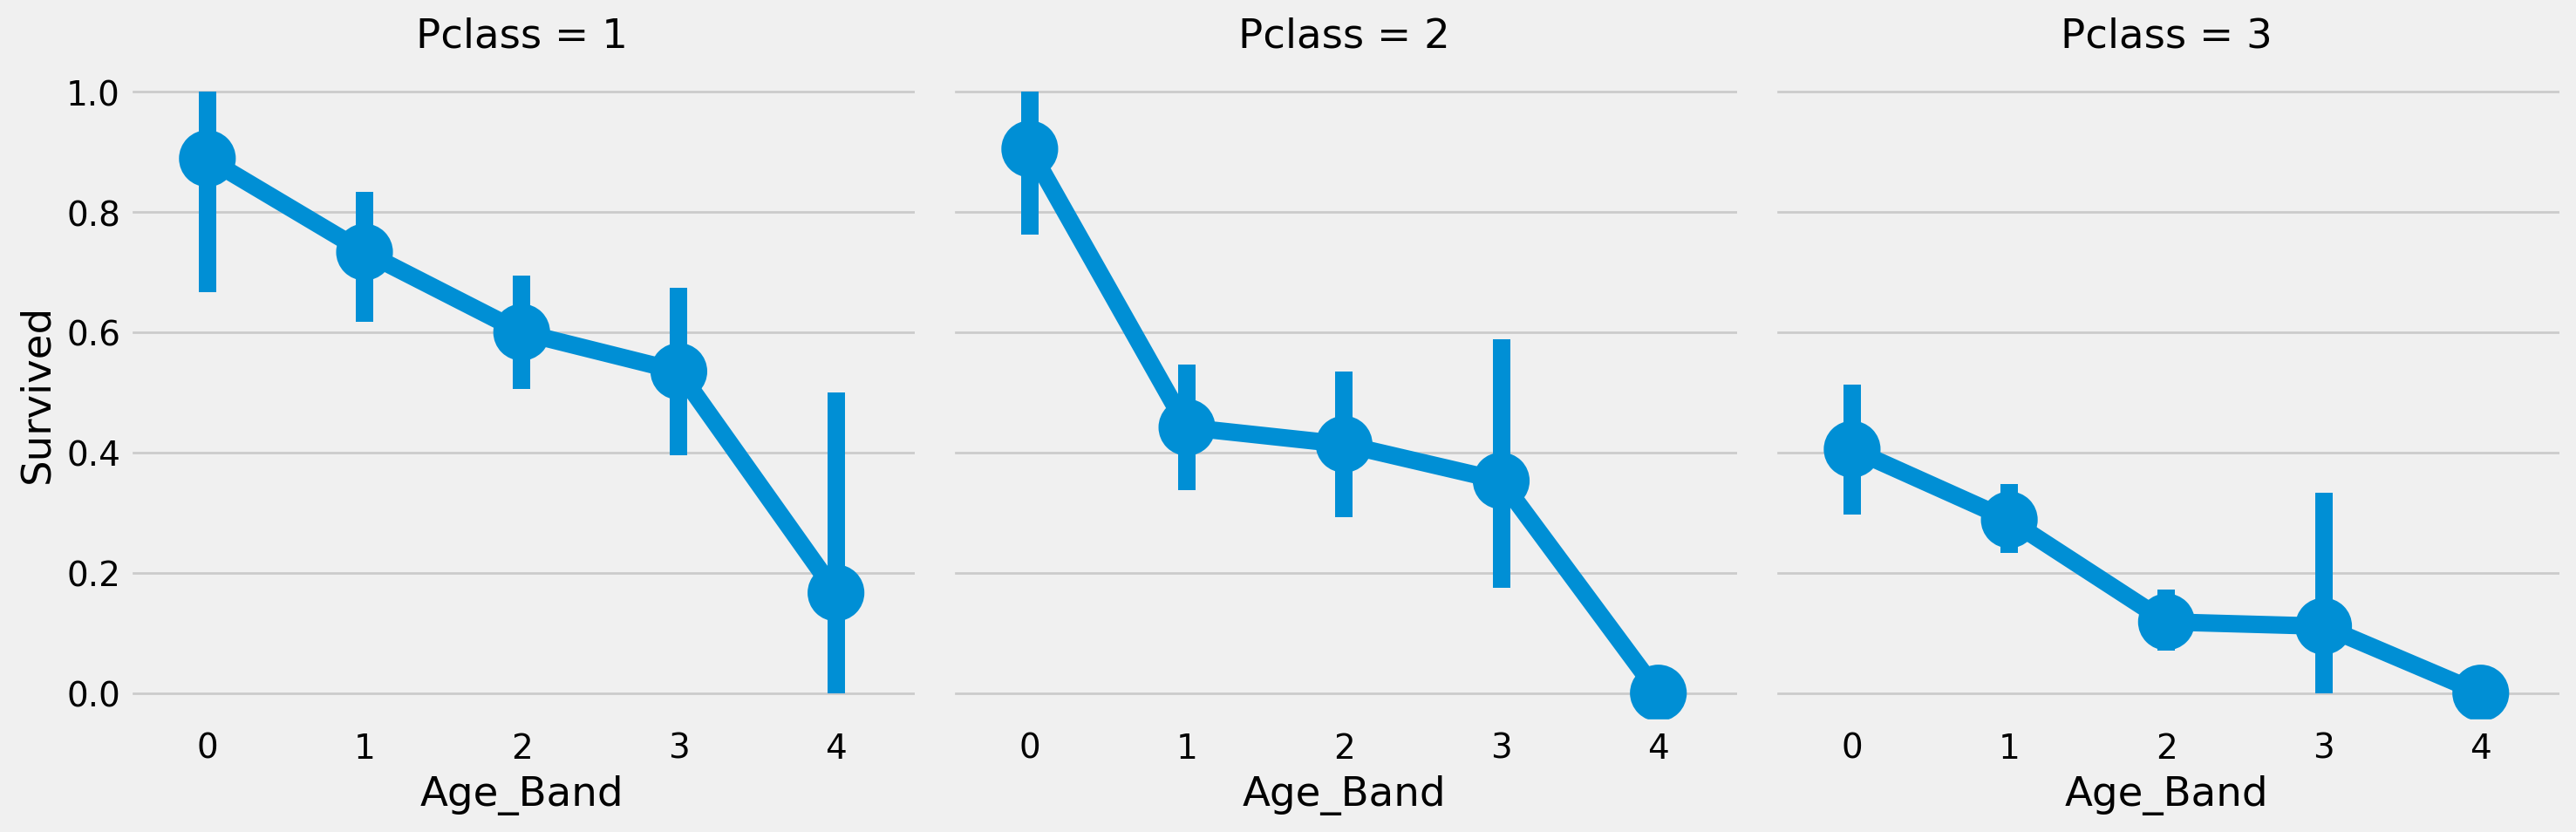

In [54]:
sns.catplot(x='Age_Band', y='Survived', data=train_df, col='Pclass', kind='point')

The survival rate tends to decrease as age increases, regardless of the passenger's class (Pclass). This observation holds true across different passenger classes.

## 5.2. Family Size & Alone <a id = "5.2"></a>

Now, let's take a step further and create two new features: "Family_size" and "Alone." These features will make our analysis even more insightful.

The "Family_size" feature will be a sum of "Parch" and "SibSp," giving us a clear picture of the passenger's family size. This will help us understand if there's a connection between family size and survival rates.

On the other hand, the "Alone" feature will simply tell us whether a passenger is traveling alone or with family. This way, we can explore how being alone or with family impacts the chances of survival.


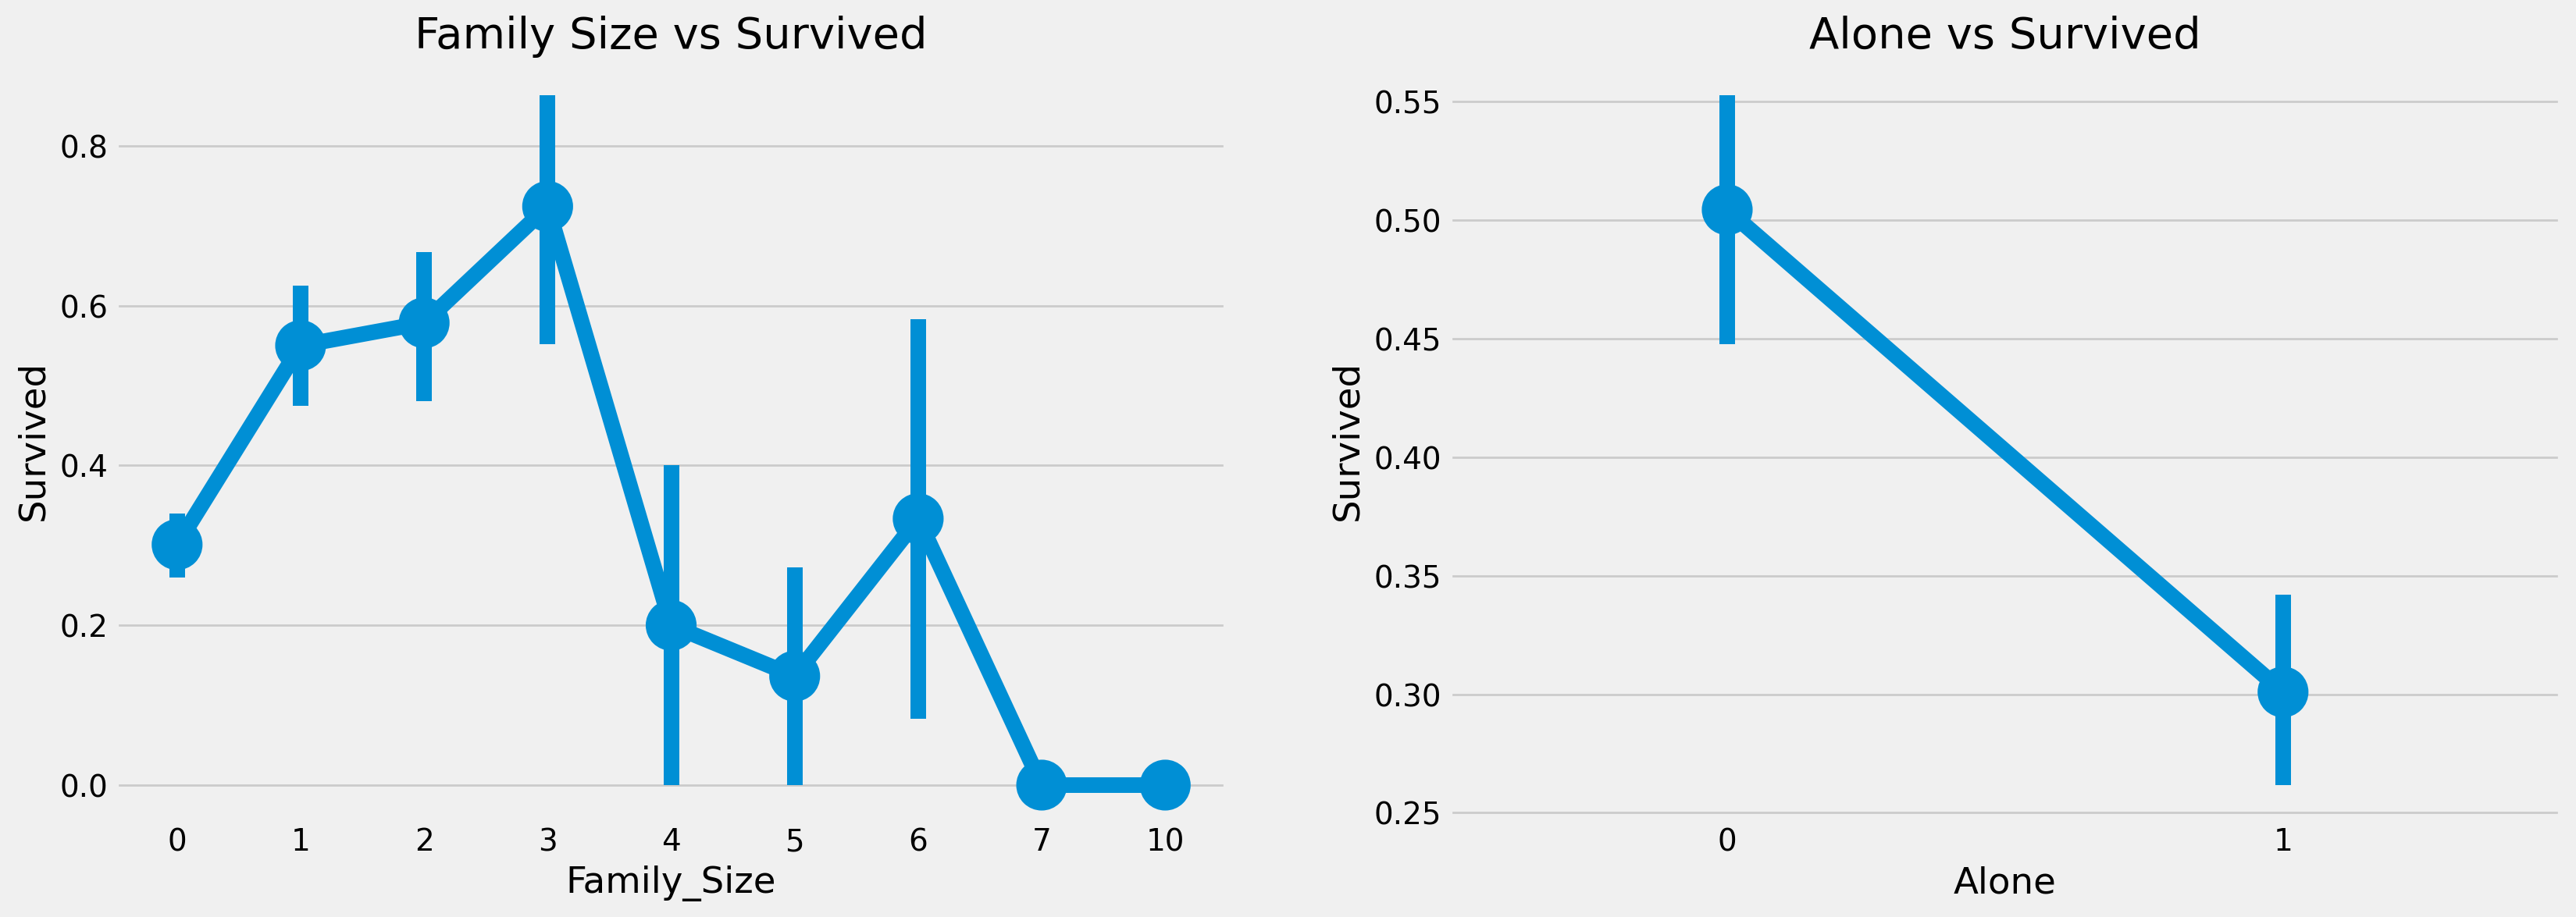

In [55]:
# Calculate Family Size
train_df['Family_Size'] = train_df['Parch'] + train_df['SibSp']

# Calculate Alone status
train_df['Alone'] = (train_df['Family_Size'] == 0).astype(int)

# Create subplots directly in a loop
fig, ax= plt.subplots(1,2,figsize=(18,6))

# Plot Familiy Size vs Survived
sns.pointplot(x='Family_Size', y='Survived', data=train_df, ax=ax[0])
ax[0].set_title('Family Size vs Survived')

# Plot Alone vs Survived
sns.pointplot(x='Alone', y='Survived', data=train_df, ax=ax[1])
ax[1].set_title('Alone vs Survived')

# Display the plot
plt.show()

If passenger has a `Family_size` of 0, it means they're traveling alone. And guess what? Being alone, or having `Family_size` of 0. makes the chances of survival pretty low. Oh, and if the family size is more than 3, the survival chances drop as well. So, it's safe to say that this `Family_size` thing is quite important for our model. Let's dig a bit deeper to really get what's going on.

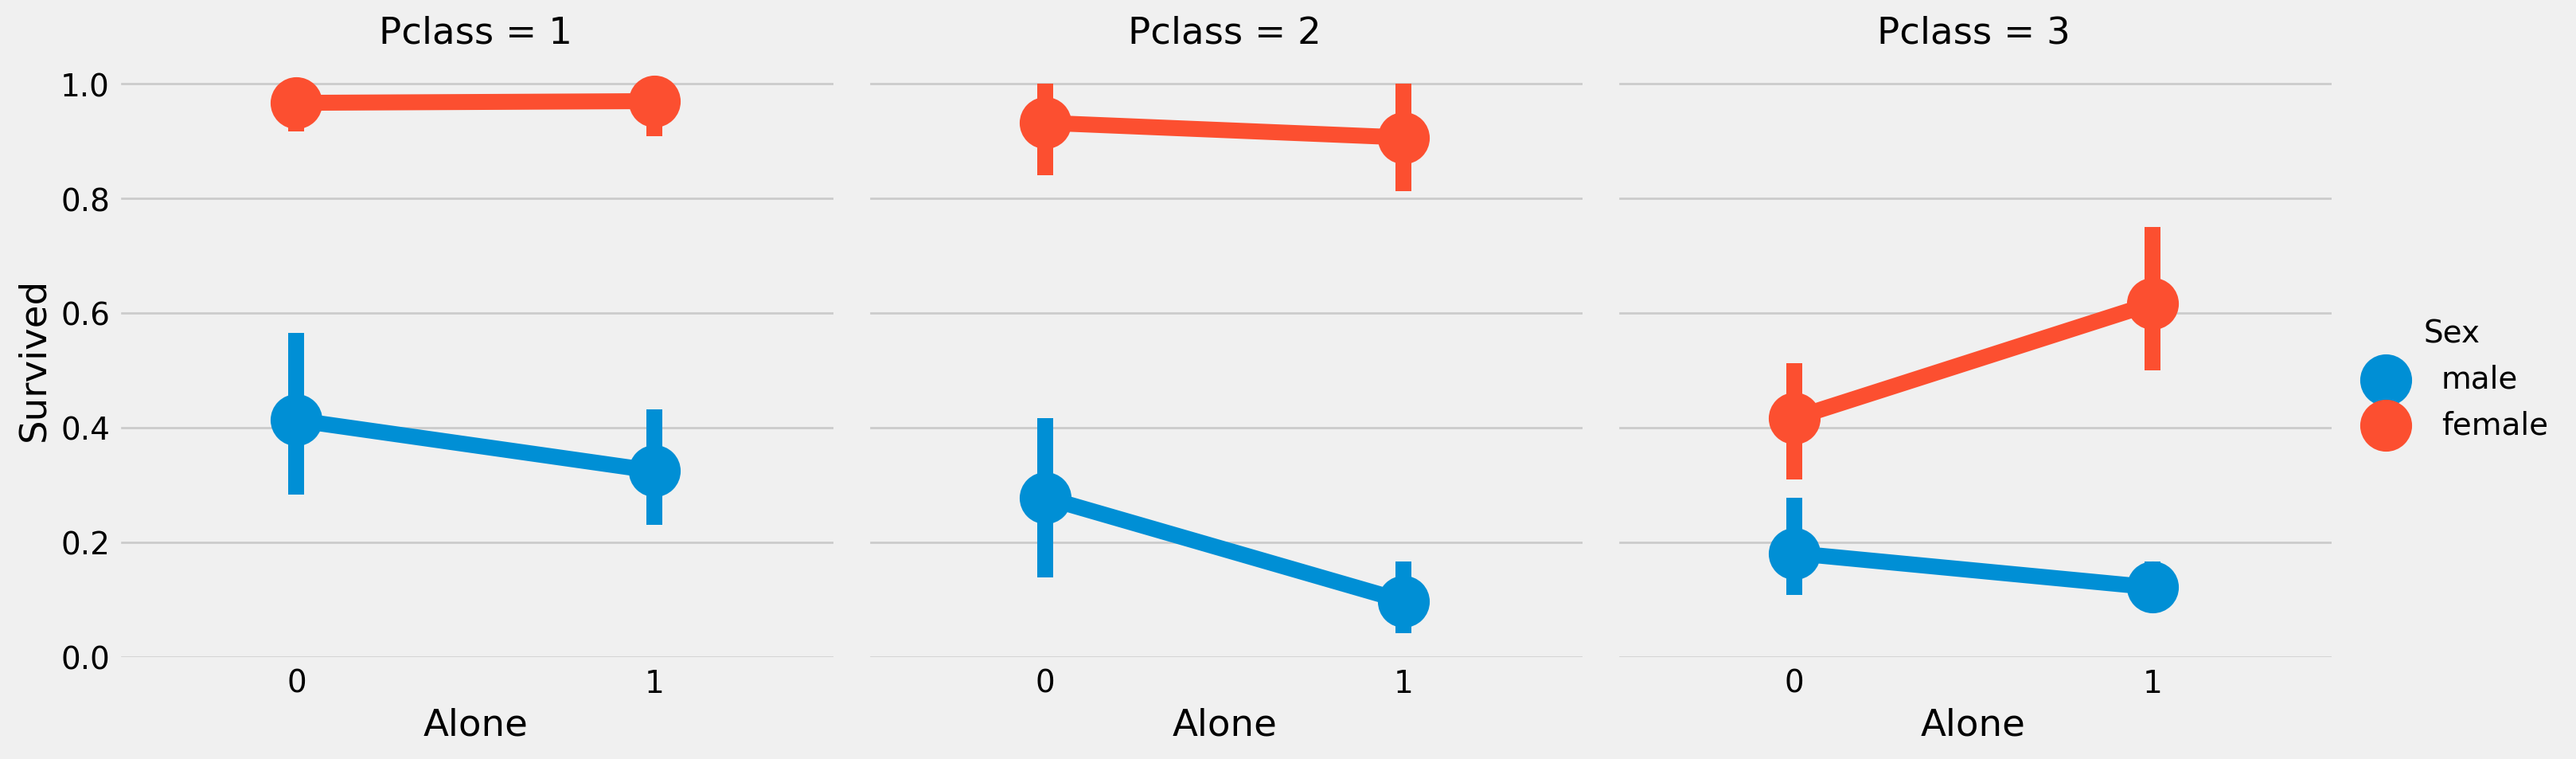

In [56]:
sns.catplot(x='Alone', y='Survived', data=train_df, col='Pclass', hue='Sex', kind='point')
plt.show()

It's pretty clear that traveling alone isn't good deal, regardless of gender or passenger class. Well, except for those in Pclass 3, where solo female passengers seem to have a higher chance of survival compared to their counterparts with family

## 5.3. Fare Range <a id = "5.3"></a>

Given that `Fare` is also a continuous feature, we'll nedd to transfrom it into an ordinal value. To do this, we can use the `pandas.qcut` function.

Here's how `qcut` works: It organizes the values based on the number of bins specified. For instance, if we set the number of bins to 5, it will evenly distribute the values into 5 separate bins or value ranges. This helps us convert the continuous `Fare` values into distinct categories.

In [57]:
# Use pd.qcut() to do the binning and directly insert the result into the Fare_Range field
train_df['Fare_Range'] = pd.qcut(train_df['Fare'],4)

# Check survival rate for each Fare Range
train_df.groupby(['Fare_Range'])['Survived'].mean().to_frame().style.background_gradient(cmap='summer_r')

,Survived
Fare_Range,
"(-0.001, 7.896]",0.197309
"(7.896, 14.454]",0.303571
"(14.454, 30.772]",0.452055
"(30.772, 263.0]",0.576577


As we've discussed earlier, it's evident that as the fare range increases, the chances of survival also increase.

However, we can't use the `Fare_Range` values as they are. We need to convert them into individual values, just like we did with the `Age_Band` earlier. 

In [58]:
# Define Bin Edges
fare_bins = [0, 7.896, 14.454, 30.772, 263.0]

# Define Bin Label
fare_labels = [0, 1, 2, 3]

# Use pd.cut() to do the binning and directly insert the result into the Age_band field
train_df['Fare_Cat'] = pd.cut(train_df['Fare'], bins=fare_bins, labels=fare_labels, right=True)

train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Initial,Age_Band,Family_Size,Alone,Fare_Range,Fare_Cat
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,S,Mr,1,1,0,"(-0.001, 7.896]",0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C,Mrs,2,1,0,"(30.772, 263.0]",3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,S,Miss,1,0,1,"(7.896, 14.454]",1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,S,Mrs,2,1,0,"(30.772, 263.0]",3
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,S,Mr,2,0,1,"(7.896, 14.454]",1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,S,Other,1,0,1,"(7.896, 14.454]",1
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,S,Miss,1,0,1,"(14.454, 30.772]",2
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,21.771812,1,2,W./C. 6607,23.4500,S,Miss,1,3,0,"(14.454, 30.772]",2
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C,Mr,1,0,1,"(14.454, 30.772]",2


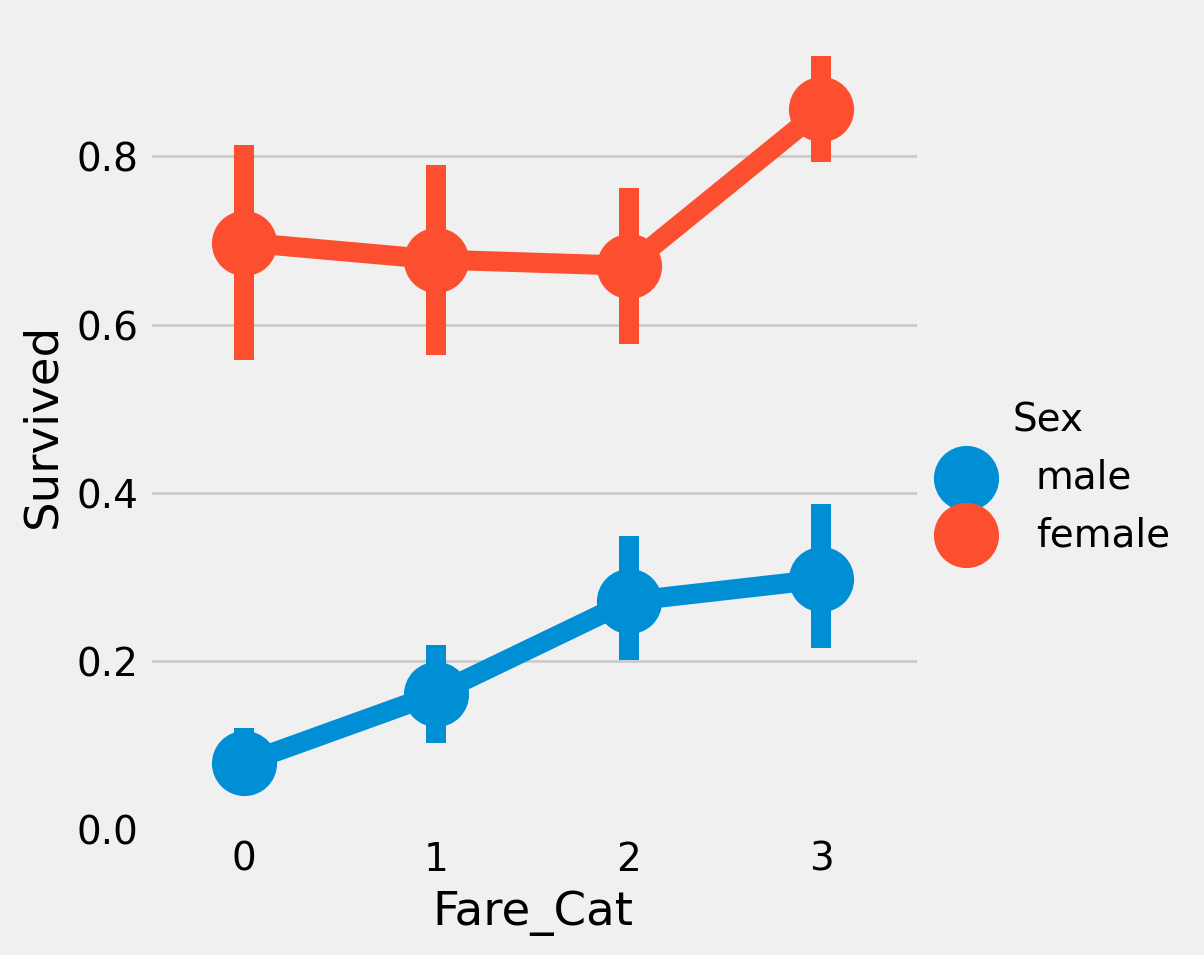

In [59]:
sns.catplot(x='Fare_Cat', y='Survived', data=train_df, hue='Sex', kind='point')
plt.show()

It's quite clear that when the Fare category (`Fare_Cat`) goes up, the chances of survival also go uop. This feature could petntially be significant during the modeling process, especially when combined with the passenger's gender (`Sex`).

## 5.4. Convert String Into Numeric <a id = "5.3"></a>

***
[Introduction](#2.1) This part is example for me to create hyperlink